In [1]:
import numpy as np
from matplotlib import pyplot as plt
import pickle
import glob
from feature import Feature
from image import Image
from model import Model, LeaveOneOutModel
from preprocess import Preprocess
from visualize import Visualize

In [2]:
# import data

data_april4 = Image('D:/U/dissertation/dataset/photos_April4/photo_object*').import_data(del_num=6)
index_pos_april4 = [8, 13, 23, 28, 33, 38, 42, 63, 68, 74, 83, 88, 93, 96, 108, 113, 128, 133, 143, 148, 153, 157, 168, 172, 182,193, 197, 206, 299, 333, 342, 382, 401, 474]
# start from second pair
index_pos_april4 = [i - 5 for i in index_pos_april4]

data_april5 = Image('D:/U/dissertation/dataset/photos_April5/photo_object*').import_data()
index_pos_april5 = [15, 22, 27, 32, 37, 43, 54, 58, 64, 69, 73, 89, 93, 98, 108, 119, 123, 133, 148, 152, 172, 177, 182, 187, 193, 209, 268, 277, 282, 287, 292, 300, 306, 310, 316, 320, 327, 331, 337, 353, 359, 411, 416, 422, 428, 433, 463, 513, 517, 565, 585,590, 595, 674, 678, 688, 698, 710, 719, 745, 750, 755, 760, 765, 770, 775, 780, 785, 790, 795, 804, 810, 815]
# start from second pair
index_pos_april5 = [i - 5 for i in index_pos_april5]

data_april7 = Image('D:/U/dissertation/dataset/photos_April7/photo_object*').import_data()
index_pos_april7 = [14, 15, 20, 37, 95, 100, 110, 125, 130, 155, 160, 165, 170, 175, 183, 194, 216, 227, 238, 300, 308, 326, 331, 346, 351, 362, 366, 371, 376, 381, 386, 391, 396, 401, 410, 421, 426, 436, 441, 462, 466, 481, 496, 504, 505, 516, 521, 525, 531, 536, 550, 556, 561, 566, 571, 575, 591, 596, 600, 611, 616, 651, 659, 665, 670, 675, 680, 690, 695, 700, 705, 710, 715, 720, 735, 740, 745, 750, 806, 835, 840, 849, 850, 855, 860, 870, 875, 880, 885, 890, 895, 900, 905, 910, 915, 925, 930, 935, 940, 945, 955, 961, 1070, 1105, 1125, 1130, 1145, 1155, 1170, 1185]
# start from second pair
index_pos_april7 = [i - 5 for i in index_pos_april7]

data_april13 = Image('D:/U/dissertation/dataset/photos_April13/photo_object*').import_data(del_num=6)
index_pos_april13 = [43, 48, 52, 63, 68, 78, 83, 88, 98, 118, 128, 133, 138, 143, 148, 153, 163, 168, 172, 194, 198, 203, 208, 213,243, 249, 263, 279, 281]
# start from second pair
index_pos_april13 = [i - 5 for i in index_pos_april13]

In [3]:
def extract_feature(data):
    training_data = np.empty((0, 624))
    for i in range(3, len(data)-1,3):
    # for i in range(3, 32,3):
        feature = Feature(data[i][1], data[i+2][1], data[i+1][1], data[i-2][1])
        output = feature.get_feature()
        training_data = np.append(training_data, output, axis=0)
    return training_data

# get labels of whole data based on indexes of pos data 
def get_label(ls, length):
    label = [ 1 if x in ls else 0 for x in range(length) ]
    return np.array(label)

In [4]:
X_april4 = extract_feature(data_april4)
X_april5 = extract_feature(data_april5)
X_april7 = extract_feature(data_april7)
X_april13 = extract_feature(data_april13)

y_april4 = get_label(index_pos_april4, len(X_april4))
y_april5 = get_label(index_pos_april5, len(X_april5))
y_april7 = get_label(index_pos_april7, len(X_april7))
y_april13 = get_label(index_pos_april13, len(X_april13))

In [5]:
# get training data and test data
X_train = np.concatenate((X_april4, X_april5, X_april7), axis=0)
X_test = X_april13

Y_train = np.concatenate((y_april4, y_april5, y_april7), axis=0)
Y_test = y_april13

In [6]:
leave_one_cv = LeaveOneOutModel(X_train, X_test, Y_train, Y_test, 'RF')

C:\Users\runningplover\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\runningplover\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\runningplover\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\runningplover\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\runningplover\Anaconda3\lib\site-pa

C:\Users\runningplover\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\runningplover\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\runningplover\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\runningplover\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\runningplover\Anaconda3\lib\site-pa

C:\Users\runningplover\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\runningplover\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\runningplover\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\runningplover\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\runningplover\Anaconda3\lib\site-pa

C:\Users\runningplover\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\runningplover\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\runningplover\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\runningplover\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\runningplover\Anaconda3\lib\site-pa

C:\Users\runningplover\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\runningplover\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\runningplover\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\runningplover\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\runningplover\Anaconda3\lib\site-pa

C:\Users\runningplover\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\runningplover\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\runningplover\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\runningplover\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\runningplover\Anaconda3\lib\site-pa

C:\Users\runningplover\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\runningplover\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\runningplover\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\runningplover\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\runningplover\Anaconda3\lib\site-pa

C:\Users\runningplover\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\runningplover\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\runningplover\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\runningplover\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\runningplover\Anaconda3\lib\site-pa

C:\Users\runningplover\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\runningplover\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\runningplover\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\runningplover\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\runningplover\Anaconda3\lib\site-pa

C:\Users\runningplover\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\runningplover\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\runningplover\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\runningplover\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\runningplover\Anaconda3\lib\site-pa

C:\Users\runningplover\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\runningplover\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\runningplover\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\runningplover\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\runningplover\Anaconda3\lib\site-pa

C:\Users\runningplover\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\runningplover\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\runningplover\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\runningplover\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\runningplover\Anaconda3\lib\site-pa

C:\Users\runningplover\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\runningplover\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\runningplover\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\runningplover\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\runningplover\Anaconda3\lib\site-pa

C:\Users\runningplover\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\runningplover\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\runningplover\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\runningplover\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\runningplover\Anaconda3\lib\site-pa

C:\Users\runningplover\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\runningplover\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\runningplover\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\runningplover\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\runningplover\Anaconda3\lib\site-pa

C:\Users\runningplover\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\runningplover\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\runningplover\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\runningplover\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\runningplover\Anaconda3\lib\site-pa

C:\Users\runningplover\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\runningplover\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\runningplover\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\runningplover\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\runningplover\Anaconda3\lib\site-pa

C:\Users\runningplover\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\runningplover\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\runningplover\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\runningplover\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\runningplover\Anaconda3\lib\site-pa

C:\Users\runningplover\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\runningplover\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\runningplover\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\runningplover\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\runningplover\Anaconda3\lib\site-pa

C:\Users\runningplover\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\runningplover\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\runningplover\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\runningplover\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\runningplover\Anaconda3\lib\site-pa

C:\Users\runningplover\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\runningplover\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\runningplover\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\runningplover\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\runningplover\Anaconda3\lib\site-pa

C:\Users\runningplover\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\runningplover\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\runningplover\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\runningplover\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\runningplover\Anaconda3\lib\site-pa

C:\Users\runningplover\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\runningplover\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\runningplover\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\runningplover\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\runningplover\Anaconda3\lib\site-pa

C:\Users\runningplover\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\runningplover\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\runningplover\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\runningplover\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\runningplover\Anaconda3\lib\site-pa

C:\Users\runningplover\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\runningplover\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\runningplover\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\runningplover\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\runningplover\Anaconda3\lib\site-pa

C:\Users\runningplover\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\runningplover\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\runningplover\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\runningplover\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\runningplover\Anaconda3\lib\site-pa

C:\Users\runningplover\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\runningplover\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\runningplover\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\runningplover\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\runningplover\Anaconda3\lib\site-pa

C:\Users\runningplover\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\runningplover\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\runningplover\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\runningplover\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\runningplover\Anaconda3\lib\site-pa

C:\Users\runningplover\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\runningplover\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\runningplover\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\runningplover\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\runningplover\Anaconda3\lib\site-pa

C:\Users\runningplover\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\runningplover\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\runningplover\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\runningplover\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\runningplover\Anaconda3\lib\site-pa

C:\Users\runningplover\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\runningplover\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\runningplover\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\runningplover\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\runningplover\Anaconda3\lib\site-pa

C:\Users\runningplover\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\runningplover\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\runningplover\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\runningplover\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\runningplover\Anaconda3\lib\site-pa

C:\Users\runningplover\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\runningplover\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\runningplover\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\runningplover\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\runningplover\Anaconda3\lib\site-pa

C:\Users\runningplover\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\runningplover\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\runningplover\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\runningplover\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\runningplover\Anaconda3\lib\site-pa

C:\Users\runningplover\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\runningplover\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\runningplover\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\runningplover\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\runningplover\Anaconda3\lib\site-pa

C:\Users\runningplover\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\runningplover\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\runningplover\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\runningplover\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\runningplover\Anaconda3\lib\site-pa

C:\Users\runningplover\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\runningplover\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\runningplover\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\runningplover\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\runningplover\Anaconda3\lib\site-pa

C:\Users\runningplover\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\runningplover\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\runningplover\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\runningplover\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\runningplover\Anaconda3\lib\site-pa

C:\Users\runningplover\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\runningplover\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\runningplover\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\runningplover\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\runningplover\Anaconda3\lib\site-pa

C:\Users\runningplover\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\runningplover\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\runningplover\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\runningplover\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\runningplover\Anaconda3\lib\site-pa

C:\Users\runningplover\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\runningplover\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\runningplover\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\runningplover\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\runningplover\Anaconda3\lib\site-pa

C:\Users\runningplover\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\runningplover\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\runningplover\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\runningplover\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\runningplover\Anaconda3\lib\site-pa

C:\Users\runningplover\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\runningplover\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\runningplover\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\runningplover\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\runningplover\Anaconda3\lib\site-pa

C:\Users\runningplover\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\runningplover\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\runningplover\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\runningplover\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\runningplover\Anaconda3\lib\site-pa

C:\Users\runningplover\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\runningplover\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\runningplover\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\runningplover\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\runningplover\Anaconda3\lib\site-pa

C:\Users\runningplover\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\runningplover\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\runningplover\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\runningplover\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\runningplover\Anaconda3\lib\site-pa

C:\Users\runningplover\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\runningplover\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\runningplover\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\runningplover\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\runningplover\Anaconda3\lib\site-pa

C:\Users\runningplover\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\runningplover\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\runningplover\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\runningplover\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\runningplover\Anaconda3\lib\site-pa

C:\Users\runningplover\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\runningplover\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\runningplover\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\runningplover\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\runningplover\Anaconda3\lib\site-pa

C:\Users\runningplover\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\runningplover\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\runningplover\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\runningplover\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\runningplover\Anaconda3\lib\site-pa

C:\Users\runningplover\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\runningplover\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\runningplover\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\runningplover\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\runningplover\Anaconda3\lib\site-pa

C:\Users\runningplover\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\runningplover\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\runningplover\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\runningplover\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\runningplover\Anaconda3\lib\site-pa

C:\Users\runningplover\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\runningplover\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\runningplover\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\runningplover\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\runningplover\Anaconda3\lib\site-pa

C:\Users\runningplover\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\runningplover\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\runningplover\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\runningplover\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\runningplover\Anaconda3\lib\site-pa

C:\Users\runningplover\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\runningplover\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\runningplover\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\runningplover\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\runningplover\Anaconda3\lib\site-pa

C:\Users\runningplover\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\runningplover\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\runningplover\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\runningplover\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\runningplover\Anaconda3\lib\site-pa

C:\Users\runningplover\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\runningplover\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\runningplover\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\runningplover\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\runningplover\Anaconda3\lib\site-pa

C:\Users\runningplover\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\runningplover\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\runningplover\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\runningplover\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\runningplover\Anaconda3\lib\site-pa

C:\Users\runningplover\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\runningplover\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\runningplover\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\runningplover\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\runningplover\Anaconda3\lib\site-pa

C:\Users\runningplover\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\runningplover\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\runningplover\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\runningplover\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\runningplover\Anaconda3\lib\site-pa

C:\Users\runningplover\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\runningplover\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\runningplover\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\runningplover\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\runningplover\Anaconda3\lib\site-pa

C:\Users\runningplover\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\runningplover\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\runningplover\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\runningplover\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\runningplover\Anaconda3\lib\site-pa

C:\Users\runningplover\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\runningplover\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\runningplover\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\runningplover\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\runningplover\Anaconda3\lib\site-pa

C:\Users\runningplover\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\runningplover\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\runningplover\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\runningplover\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\runningplover\Anaconda3\lib\site-pa

C:\Users\runningplover\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\runningplover\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\runningplover\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\runningplover\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\runningplover\Anaconda3\lib\site-pa

C:\Users\runningplover\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\runningplover\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\runningplover\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\runningplover\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\runningplover\Anaconda3\lib\site-pa

C:\Users\runningplover\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\runningplover\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\runningplover\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\runningplover\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\runningplover\Anaconda3\lib\site-pa

C:\Users\runningplover\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\runningplover\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\runningplover\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\runningplover\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\runningplover\Anaconda3\lib\site-pa

C:\Users\runningplover\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\runningplover\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\runningplover\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\runningplover\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\runningplover\Anaconda3\lib\site-pa

C:\Users\runningplover\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\runningplover\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\runningplover\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\runningplover\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\runningplover\Anaconda3\lib\site-pa

C:\Users\runningplover\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\runningplover\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\runningplover\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\runningplover\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\runningplover\Anaconda3\lib\site-pa

C:\Users\runningplover\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\runningplover\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\runningplover\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\runningplover\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\runningplover\Anaconda3\lib\site-pa

C:\Users\runningplover\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\runningplover\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\runningplover\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\runningplover\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\runningplover\Anaconda3\lib\site-pa

In [7]:
leave_one_cv.fpr

array([0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 4.02738623e-04,
       4.02738623e-04, 8.05477245e-04, 8.05477245e-04, 1.61095449e-03,
       1.61095449e-03, 2.01369311e-03, 2.01369311e-03, 3.22190898e-03,
       3.22190898e-03, 3.62464760e-03, 3.62464760e-03, 4.02738623e-03,
       4.02738623e-03, 4.43012485e-03, 4.43012485e-03, 4.83286347e-03,
       4.83286347e-03, 5.23560209e-03, 5.23560209e-03, 5.63834072e-03,
       5.63834072e-03, 6.04107934e-03, 6.04107934e-03, 6.44381796e-03,
       6.44381796e-03, 6.84655658e-03, 6.84655658e-03, 7.24929521e-03,
       7.24929521e-03, 7.65203383e-03, 7.65203383e-03, 8.05477245e-03,
       8.05477245e-03, 8.86024970e-03, 8.86024970e-03, 9.26298832e-03,
       9.26298832e-03, 9.66572694e-03, 9.66572694e-03, 1.00684656e-02,
       1.00684656e-02, 1.04712042e-02, 1.04712042e-02, 1.16794201e-02,
       1.16794201e-02, 1.20821587e-02, 1.20821587e-02, 1.24848973e-02,
       1.24848973e-02, 1.28876359e-02, 1.28876359e-02, 1.32903745e-02,
      

In [8]:
leave_one_cv.tpr

array([0.        , 0.00460829, 0.10599078, 0.10599078, 0.20737327,
       0.20737327, 0.21658986, 0.21658986, 0.23041475, 0.23041475,
       0.23963134, 0.23963134, 0.26267281, 0.26267281, 0.28571429,
       0.28571429, 0.39631336, 0.39631336, 0.43778802, 0.43778802,
       0.44239631, 0.44239631, 0.46543779, 0.46543779, 0.48847926,
       0.48847926, 0.49769585, 0.49769585, 0.50230415, 0.50230415,
       0.50691244, 0.50691244, 0.52073733, 0.52073733, 0.52995392,
       0.52995392, 0.53456221, 0.53456221, 0.56221198, 0.56221198,
       0.58525346, 0.58525346, 0.58986175, 0.58986175, 0.59447005,
       0.59447005, 0.60829493, 0.60829493, 0.61751152, 0.61751152,
       0.62672811, 0.62672811, 0.63133641, 0.63133641, 0.64516129,
       0.64516129, 0.66359447, 0.66359447, 0.66820276, 0.66820276,
       0.67281106, 0.67281106, 0.67741935, 0.67741935, 0.7235023 ,
       0.7235023 , 0.7281106 , 0.7281106 , 0.74193548, 0.74193548,
       0.75115207, 0.75115207, 0.75576037, 0.75576037, 0.76036

In [9]:
leave_one_cv.thrshd_roc

array([1.6846387 , 0.6846387 , 0.6536601 , 0.6525736 , 0.61974915,
       0.61903993, 0.61748001, 0.61699641, 0.61585671, 0.61575965,
       0.61461653, 0.61400042, 0.60873879, 0.60612428, 0.59384458,
       0.58889532, 0.55056473, 0.54786636, 0.54092613, 0.53085581,
       0.52788201, 0.5253012 , 0.51635153, 0.51579187, 0.50299313,
       0.50105917, 0.50012877, 0.49784724, 0.49515287, 0.49320162,
       0.48993228, 0.48867313, 0.47468969, 0.46931856, 0.45707528,
       0.45285796, 0.44645413, 0.44064239, 0.42390382, 0.42358199,
       0.40923308, 0.40799767, 0.40714702, 0.40629976, 0.40482883,
       0.4037893 , 0.39990987, 0.39684597, 0.39415471, 0.39405962,
       0.38999581, 0.38919526, 0.38797828, 0.38566713, 0.38079595,
       0.38069607, 0.37860317, 0.374496  , 0.37448778, 0.37095151,
       0.3701952 , 0.36890633, 0.36860493, 0.36272153, 0.34327271,
       0.34045813, 0.34008691, 0.33837488, 0.33382196, 0.33221162,
       0.33122039, 0.33097866, 0.32922331, 0.31433331, 0.31171

In [10]:
optimal_idx = np.argmax(leave_one_cv.tpr - leave_one_cv.fpr)
optimal_threshold = leave_one_cv.thrshd_roc[optimal_idx]

In [11]:
optimal_threshold

0.09318188830581008

In [12]:
# use different thereshold to get the metric of test data

for _threshold in leave_one_cv.thrshd_roc:
    print('when the thereshold is %.16f' % _threshold)
    leave_one_cv.get_metrics(_threshold)

when the thereshold is 1.6846386955481680


C:\Users\runningplover\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


RF:
              precision    recall  f1-score   support

           0       0.90      1.00      0.95       251
           1       0.00      0.00      0.00        29

    accuracy                           0.90       280
   macro avg       0.45      0.50      0.47       280
weighted avg       0.80      0.90      0.85       280


when the thereshold is 0.6846386955481681
RF:
              precision    recall  f1-score   support

           0       0.92      1.00      0.96       251
           1       1.00      0.24      0.39        29

    accuracy                           0.92       280
   macro avg       0.96      0.62      0.67       280
weighted avg       0.93      0.92      0.90       280


when the thereshold is 0.6536600967350675
RF:
              precision    recall  f1-score   support

           0       0.92      1.00      0.96       251
           1       1.00      0.24      0.39        29

    accuracy                           0.92       280
   macro avg       0.96      0

RF:
              precision    recall  f1-score   support

           0       0.98      0.81      0.89       251
           1       0.34      0.83      0.48        29

    accuracy                           0.81       280
   macro avg       0.66      0.82      0.68       280
weighted avg       0.91      0.81      0.84       280


when the thereshold is 0.4239038233070681
RF:
              precision    recall  f1-score   support

           0       0.98      0.81      0.89       251
           1       0.34      0.83      0.48        29

    accuracy                           0.81       280
   macro avg       0.66      0.82      0.68       280
weighted avg       0.91      0.81      0.84       280


when the thereshold is 0.4235819869593073
RF:
              precision    recall  f1-score   support

           0       0.98      0.81      0.89       251
           1       0.34      0.83      0.48        29

    accuracy                           0.81       280
   macro avg       0.66      0

RF:
              precision    recall  f1-score   support

           0       0.98      0.76      0.86       251
           1       0.30      0.86      0.44        29

    accuracy                           0.78       280
   macro avg       0.64      0.81      0.65       280
weighted avg       0.91      0.78      0.82       280


when the thereshold is 0.3117176560528480
RF:
              precision    recall  f1-score   support

           0       0.98      0.76      0.86       251
           1       0.29      0.86      0.44        29

    accuracy                           0.77       280
   macro avg       0.64      0.81      0.65       280
weighted avg       0.91      0.77      0.81       280


when the thereshold is 0.3112898410194861
RF:
              precision    recall  f1-score   support

           0       0.98      0.76      0.86       251
           1       0.29      0.86      0.44        29

    accuracy                           0.77       280
   macro avg       0.64      0

RF:
              precision    recall  f1-score   support

           0       0.99      0.60      0.75       251
           1       0.22      0.97      0.36        29

    accuracy                           0.64       280
   macro avg       0.61      0.78      0.55       280
weighted avg       0.91      0.64      0.71       280


when the thereshold is 0.1674143731168210
RF:
              precision    recall  f1-score   support

           0       0.99      0.60      0.75       251
           1       0.22      0.97      0.36        29

    accuracy                           0.64       280
   macro avg       0.61      0.78      0.55       280
weighted avg       0.91      0.64      0.71       280


when the thereshold is 0.1651068133096829
RF:
              precision    recall  f1-score   support

           0       0.99      0.59      0.74       251
           1       0.21      0.97      0.35        29

    accuracy                           0.62       280
   macro avg       0.60      0

RF:
              precision    recall  f1-score   support

           0       0.99      0.44      0.61       251
           1       0.17      0.97      0.28        29

    accuracy                           0.50       280
   macro avg       0.58      0.70      0.45       280
weighted avg       0.91      0.50      0.58       280


when the thereshold is 0.0944005047078453
RF:
              precision    recall  f1-score   support

           0       0.99      0.42      0.59       251
           1       0.16      0.97      0.28        29

    accuracy                           0.48       280
   macro avg       0.58      0.69      0.43       280
weighted avg       0.90      0.47      0.56       280


when the thereshold is 0.0943787112451024
RF:
              precision    recall  f1-score   support

           0       0.99      0.42      0.59       251
           1       0.16      0.97      0.28        29

    accuracy                           0.48       280
   macro avg       0.58      0

RF:
              precision    recall  f1-score   support

           0       1.00      0.37      0.54       251
           1       0.15      1.00      0.27        29

    accuracy                           0.43       280
   macro avg       0.58      0.68      0.40       280
weighted avg       0.91      0.43      0.51       280


when the thereshold is 0.0697393868281592
RF:
              precision    recall  f1-score   support

           0       1.00      0.37      0.54       251
           1       0.15      1.00      0.27        29

    accuracy                           0.43       280
   macro avg       0.58      0.68      0.40       280
weighted avg       0.91      0.43      0.51       280


when the thereshold is 0.0697145651419990
RF:
              precision    recall  f1-score   support

           0       1.00      0.37      0.54       251
           1       0.15      1.00      0.27        29

    accuracy                           0.43       280
   macro avg       0.58      0

RF:
              precision    recall  f1-score   support

           0       1.00      0.26      0.41       251
           1       0.13      1.00      0.24        29

    accuracy                           0.34       280
   macro avg       0.57      0.63      0.32       280
weighted avg       0.91      0.34      0.39       280


when the thereshold is 0.0457025209341192
RF:
              precision    recall  f1-score   support

           0       1.00      0.24      0.39       251
           1       0.13      1.00      0.23        29

    accuracy                           0.32       280
   macro avg       0.57      0.62      0.31       280
weighted avg       0.91      0.32      0.37       280


when the thereshold is 0.0456347457313060
RF:
              precision    recall  f1-score   support

           0       1.00      0.24      0.39       251
           1       0.13      1.00      0.23        29

    accuracy                           0.32       280
   macro avg       0.57      0

RF:
              precision    recall  f1-score   support

           0       1.00      0.23      0.37       251
           1       0.13      1.00      0.23        29

    accuracy                           0.31       280
   macro avg       0.57      0.61      0.30       280
weighted avg       0.91      0.31      0.36       280


when the thereshold is 0.0359089438888020
RF:
              precision    recall  f1-score   support

           0       1.00      0.23      0.37       251
           1       0.13      1.00      0.23        29

    accuracy                           0.31       280
   macro avg       0.57      0.61      0.30       280
weighted avg       0.91      0.31      0.36       280


when the thereshold is 0.0320416704492239
RF:
              precision    recall  f1-score   support

           0       1.00      0.22      0.36       251
           1       0.13      1.00      0.23        29

    accuracy                           0.30       280
   macro avg       0.56      0

RF:
              precision    recall  f1-score   support

           0       1.00      0.20      0.33       251
           1       0.13      1.00      0.22        29

    accuracy                           0.28       280
   macro avg       0.56      0.60      0.27       280
weighted avg       0.91      0.28      0.32       280


when the thereshold is 0.0286320981641376
RF:
              precision    recall  f1-score   support

           0       1.00      0.20      0.33       251
           1       0.13      1.00      0.22        29

    accuracy                           0.28       280
   macro avg       0.56      0.60      0.27       280
weighted avg       0.91      0.28      0.32       280


when the thereshold is 0.0286277460315694
RF:
              precision    recall  f1-score   support

           0       1.00      0.20      0.33       251
           1       0.13      1.00      0.22        29

    accuracy                           0.28       280
   macro avg       0.56      0

RF:
              precision    recall  f1-score   support

           0       1.00      0.12      0.21       251
           1       0.12      1.00      0.21        29

    accuracy                           0.21       280
   macro avg       0.56      0.56      0.21       280
weighted avg       0.91      0.21      0.21       280


when the thereshold is 0.0236855802605571
RF:
              precision    recall  f1-score   support

           0       1.00      0.12      0.21       251
           1       0.12      1.00      0.21        29

    accuracy                           0.21       280
   macro avg       0.56      0.56      0.21       280
weighted avg       0.91      0.21      0.21       280


when the thereshold is 0.0224113711152009
RF:
              precision    recall  f1-score   support

           0       1.00      0.12      0.21       251
           1       0.12      1.00      0.21        29

    accuracy                           0.21       280
   macro avg       0.56      0

RF:
              precision    recall  f1-score   support

           0       1.00      0.10      0.17       251
           1       0.11      1.00      0.20        29

    accuracy                           0.19       280
   macro avg       0.56      0.55      0.19       280
weighted avg       0.91      0.19      0.18       280


when the thereshold is 0.0149113420324827
RF:
              precision    recall  f1-score   support

           0       1.00      0.10      0.17       251
           1       0.11      1.00      0.20        29

    accuracy                           0.19       280
   macro avg       0.56      0.55      0.19       280
weighted avg       0.91      0.19      0.18       280


when the thereshold is 0.0149103947403827
RF:
              precision    recall  f1-score   support

           0       1.00      0.10      0.17       251
           1       0.11      1.00      0.20        29

    accuracy                           0.19       280
   macro avg       0.56      0

RF:
              precision    recall  f1-score   support

           0       1.00      0.10      0.17       251
           1       0.11      1.00      0.20        29

    accuracy                           0.19       280
   macro avg       0.56      0.55      0.19       280
weighted avg       0.91      0.19      0.18       280


when the thereshold is 0.0146549797973689
RF:
              precision    recall  f1-score   support

           0       1.00      0.10      0.17       251
           1       0.11      1.00      0.20        29

    accuracy                           0.19       280
   macro avg       0.56      0.55      0.19       280
weighted avg       0.91      0.19      0.18       280


when the thereshold is 0.0146530537702909
RF:
              precision    recall  f1-score   support

           0       1.00      0.10      0.17       251
           1       0.11      1.00      0.20        29

    accuracy                           0.19       280
   macro avg       0.56      0

RF:
              precision    recall  f1-score   support

           0       1.00      0.09      0.16       251
           1       0.11      1.00      0.20        29

    accuracy                           0.18       280
   macro avg       0.56      0.54      0.18       280
weighted avg       0.91      0.18      0.17       280


when the thereshold is 0.0140123093920920
RF:
              precision    recall  f1-score   support

           0       1.00      0.09      0.16       251
           1       0.11      1.00      0.20        29

    accuracy                           0.18       280
   macro avg       0.56      0.54      0.18       280
weighted avg       0.91      0.18      0.17       280


when the thereshold is 0.0140098496092746
RF:
              precision    recall  f1-score   support

           0       1.00      0.09      0.16       251
           1       0.11      1.00      0.20        29

    accuracy                           0.18       280
   macro avg       0.56      0

RF:
              precision    recall  f1-score   support

           0       1.00      0.09      0.16       251
           1       0.11      1.00      0.20        29

    accuracy                           0.18       280
   macro avg       0.56      0.54      0.18       280
weighted avg       0.91      0.18      0.17       280


when the thereshold is 0.0135211385082146
RF:
              precision    recall  f1-score   support

           0       1.00      0.09      0.16       251
           1       0.11      1.00      0.20        29

    accuracy                           0.18       280
   macro avg       0.56      0.54      0.18       280
weighted avg       0.91      0.18      0.17       280


when the thereshold is 0.0135197170479052
RF:
              precision    recall  f1-score   support

           0       1.00      0.09      0.16       251
           1       0.11      1.00      0.20        29

    accuracy                           0.18       280
   macro avg       0.56      0

C:\Users\runningplover\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\runningplover\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\runningplover\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\runningplover\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 

RF:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       251
           1       0.10      1.00      0.19        29

    accuracy                           0.10       280
   macro avg       0.05      0.50      0.09       280
weighted avg       0.01      0.10      0.02       280


when the thereshold is 0.0130103290838552
RF:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       251
           1       0.10      1.00      0.19        29

    accuracy                           0.10       280
   macro avg       0.05      0.50      0.09       280
weighted avg       0.01      0.10      0.02       280


when the thereshold is 0.0130101093879184
RF:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       251
           1       0.10      1.00      0.19        29

    accuracy                           0.10       280
   macro avg       0.05      0

C:\Users\runningplover\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\runningplover\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\runningplover\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\runningplover\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 

RF:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       251
           1       0.10      1.00      0.19        29

    accuracy                           0.10       280
   macro avg       0.05      0.50      0.09       280
weighted avg       0.01      0.10      0.02       280


when the thereshold is 0.0124777019338871
RF:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       251
           1       0.10      1.00      0.19        29

    accuracy                           0.10       280
   macro avg       0.05      0.50      0.09       280
weighted avg       0.01      0.10      0.02       280


when the thereshold is 0.0124689616206473
RF:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       251
           1       0.10      1.00      0.19        29

    accuracy                           0.10       280
   macro avg       0.05      0

C:\Users\runningplover\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\runningplover\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\runningplover\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\runningplover\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 

RF:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       251
           1       0.10      1.00      0.19        29

    accuracy                           0.10       280
   macro avg       0.05      0.50      0.09       280
weighted avg       0.01      0.10      0.02       280


when the thereshold is 0.0121917250658607
RF:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       251
           1       0.10      1.00      0.19        29

    accuracy                           0.10       280
   macro avg       0.05      0.50      0.09       280
weighted avg       0.01      0.10      0.02       280


when the thereshold is 0.0121867289997387
RF:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       251
           1       0.10      1.00      0.19        29

    accuracy                           0.10       280
   macro avg       0.05      0

RF:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       251
           1       0.10      1.00      0.19        29

    accuracy                           0.10       280
   macro avg       0.05      0.50      0.09       280
weighted avg       0.01      0.10      0.02       280


when the thereshold is 0.0112047100026869
RF:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       251
           1       0.10      1.00      0.19        29

    accuracy                           0.10       280
   macro avg       0.05      0.50      0.09       280
weighted avg       0.01      0.10      0.02       280




C:\Users\runningplover\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\runningplover\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\runningplover\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\runningplover\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 

In [13]:
visual = Visualize()

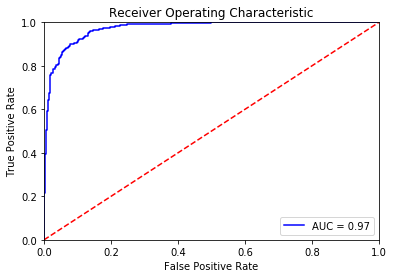

0

In [14]:
visual.plot_roc_curve(leave_one_cv.fpr, leave_one_cv.tpr)

# the confusion matrix of test data

when the thereshold is 1.6846386955481680
when the thereshold is 0.6846386955481681


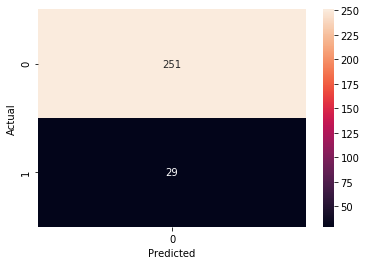

when the thereshold is 0.6536600967350675


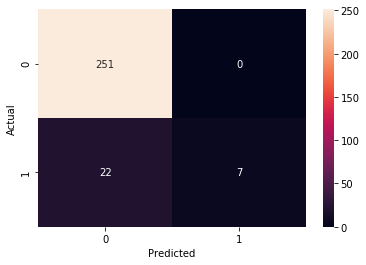

when the thereshold is 0.6525736029897026


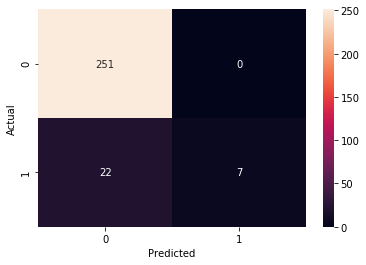

when the thereshold is 0.6197491492897209


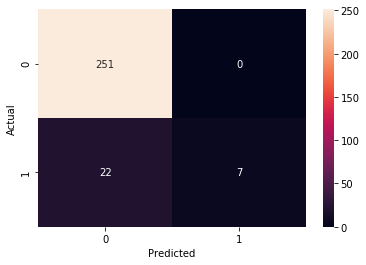

when the thereshold is 0.6190399320755253


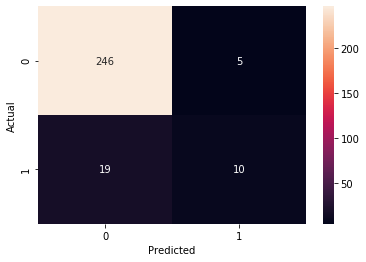

when the thereshold is 0.6174800070614690


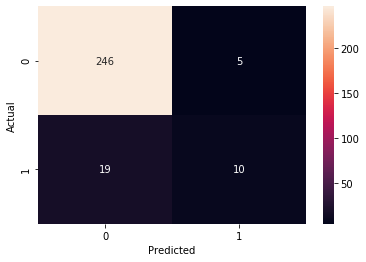

when the thereshold is 0.6169964067152882


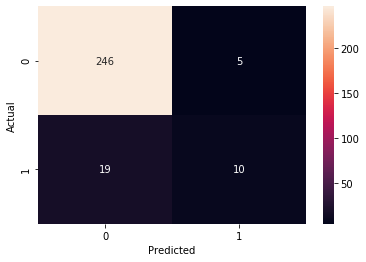

when the thereshold is 0.6158567083080853


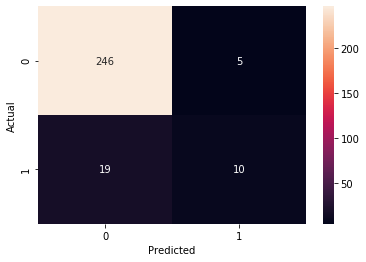

when the thereshold is 0.6157596467325278


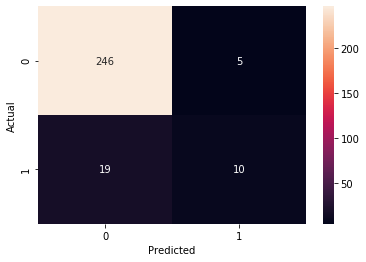

when the thereshold is 0.6146165268672859


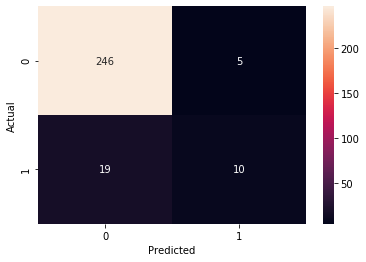

when the thereshold is 0.6140004208581130


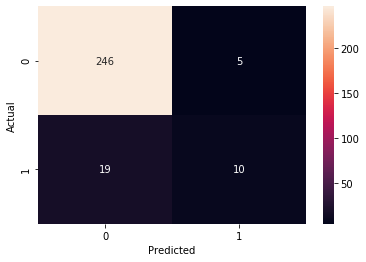

when the thereshold is 0.6087387947043751


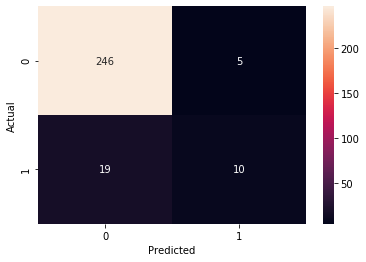

when the thereshold is 0.6061242815301607


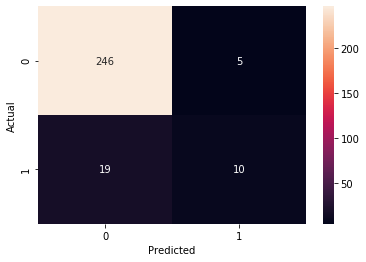

when the thereshold is 0.5938445804281743


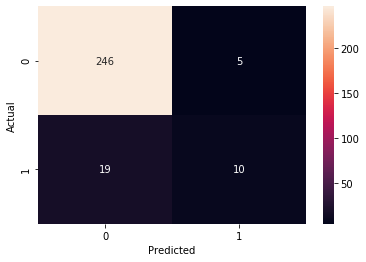

when the thereshold is 0.5888953203454079


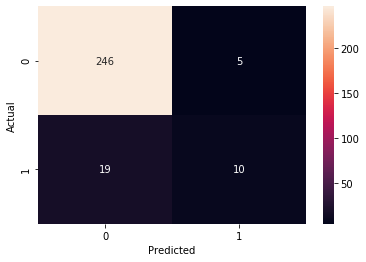

when the thereshold is 0.5505647347849592


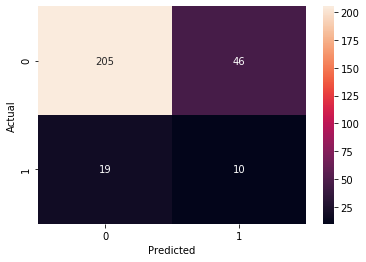

when the thereshold is 0.5478663605651810


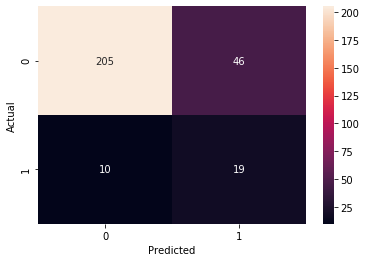

when the thereshold is 0.5409261302408886


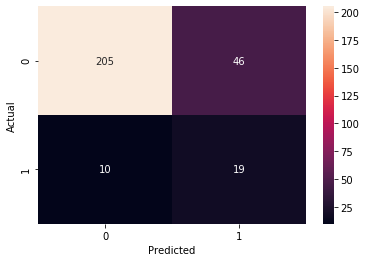

when the thereshold is 0.5308558050413148


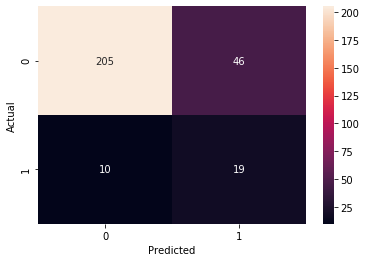

when the thereshold is 0.5278820110602802


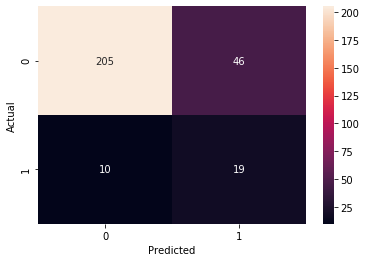

when the thereshold is 0.5253012030268459


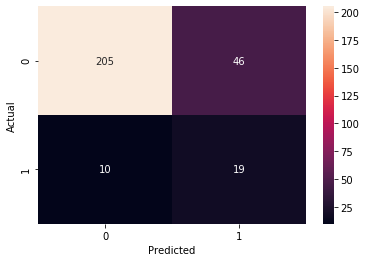

when the thereshold is 0.5163515268887023


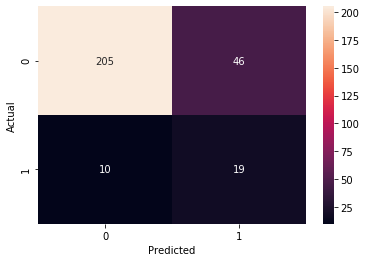

when the thereshold is 0.5157918721460309


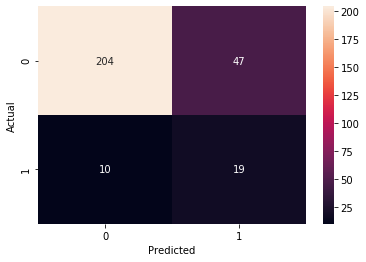

when the thereshold is 0.5029931309274707


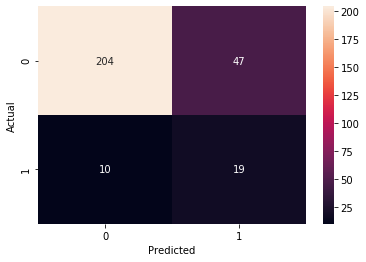

when the thereshold is 0.5010591670364924


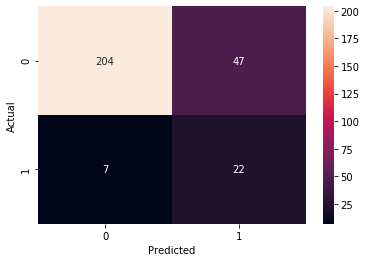

when the thereshold is 0.5001287690726930


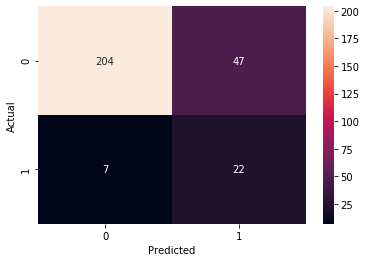

when the thereshold is 0.4978472413267319


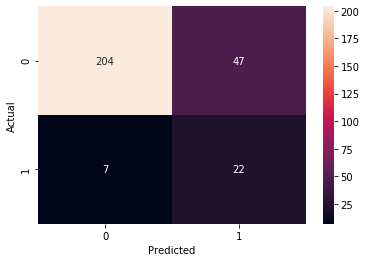

when the thereshold is 0.4951528680514919


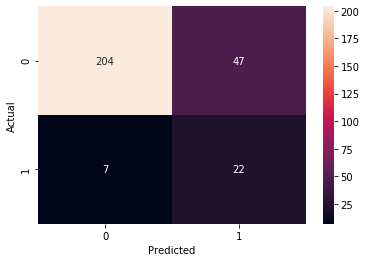

when the thereshold is 0.4932016191618471


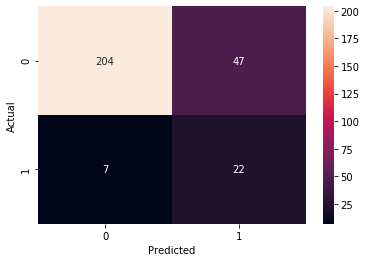

when the thereshold is 0.4899322754918322


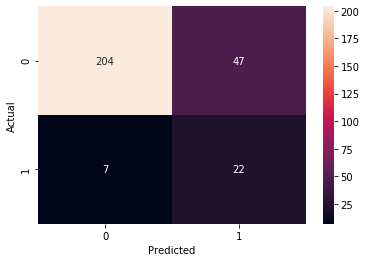

when the thereshold is 0.4886731296212056


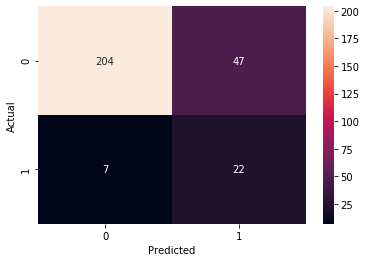

when the thereshold is 0.4746896942970699


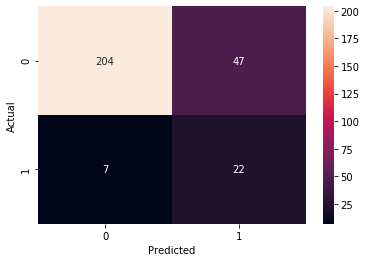

when the thereshold is 0.4693185609417166


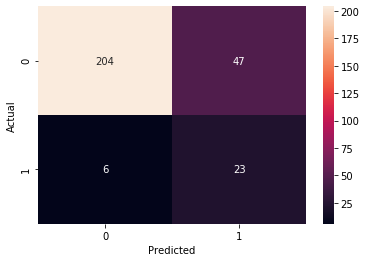

when the thereshold is 0.4570752821834096


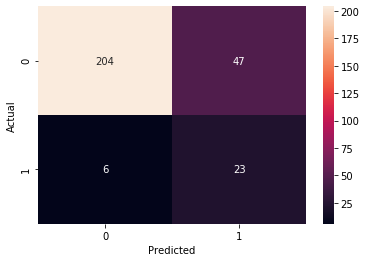

when the thereshold is 0.4528579554245352


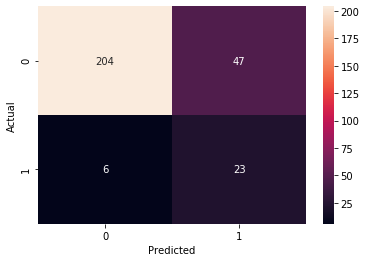

when the thereshold is 0.4464541306683059


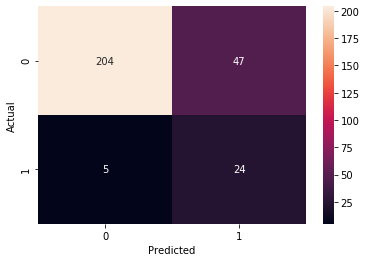

when the thereshold is 0.4406423903177357


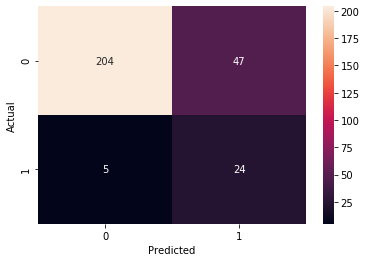

when the thereshold is 0.4239038233070681


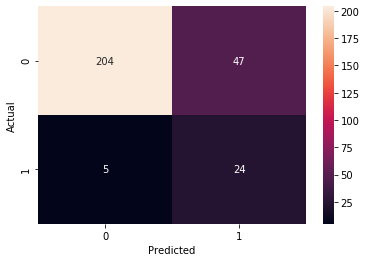

when the thereshold is 0.4235819869593073


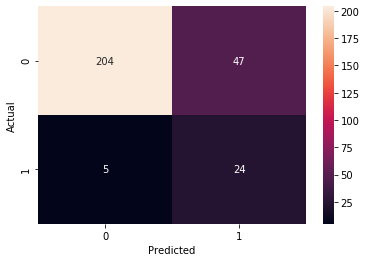

when the thereshold is 0.4092330777101945


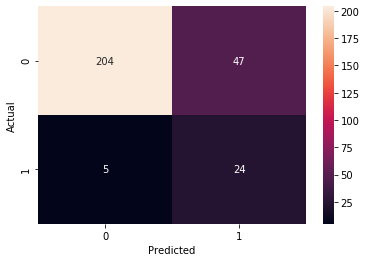

when the thereshold is 0.4079976699097278


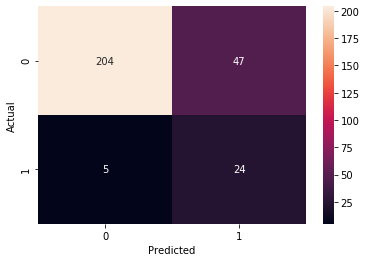

when the thereshold is 0.4071470211586926


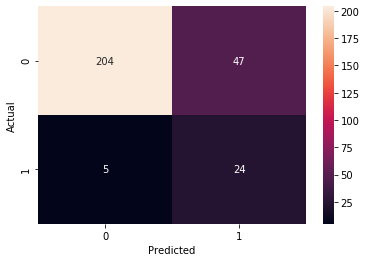

when the thereshold is 0.4062997579575729


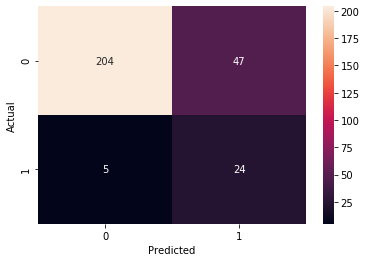

when the thereshold is 0.4048288286106280


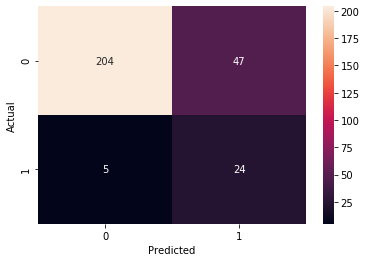

when the thereshold is 0.4037892961408392


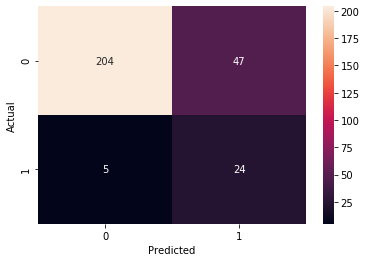

when the thereshold is 0.3999098746793853


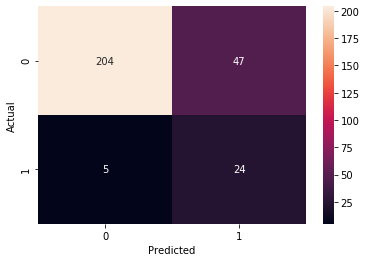

when the thereshold is 0.3968459650512834


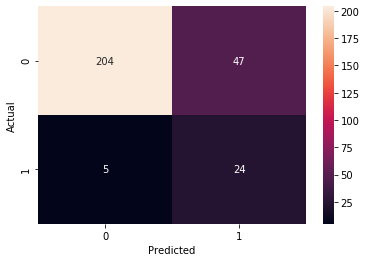

when the thereshold is 0.3941547068430945


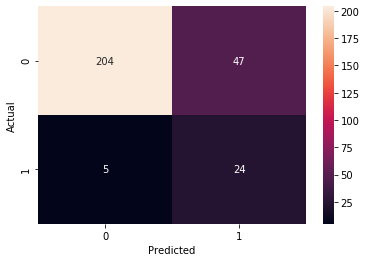

when the thereshold is 0.3940596171895826


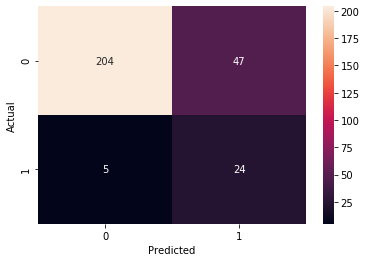

when the thereshold is 0.3899958073993877


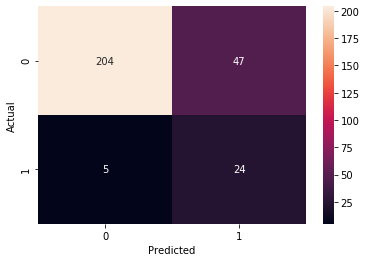

when the thereshold is 0.3891952610078004


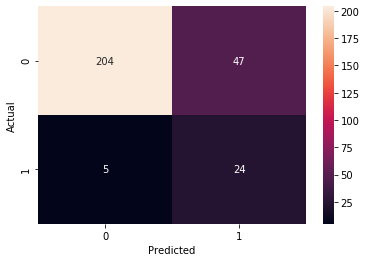

when the thereshold is 0.3879782807897424


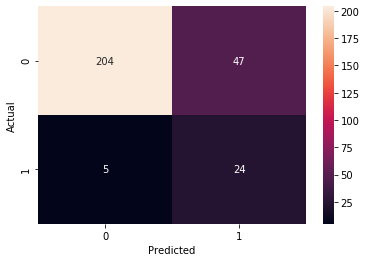

when the thereshold is 0.3856671334326658


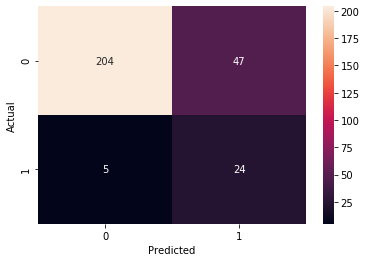

when the thereshold is 0.3807959508879150


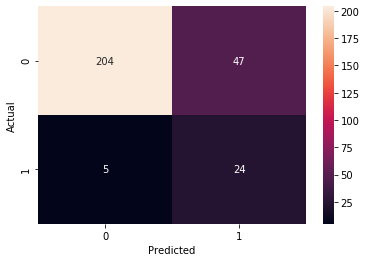

when the thereshold is 0.3806960682260342


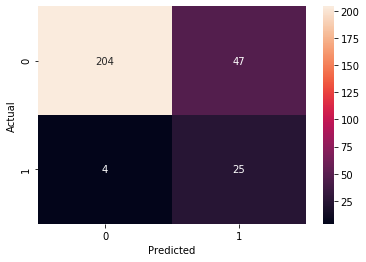

when the thereshold is 0.3786031671591851


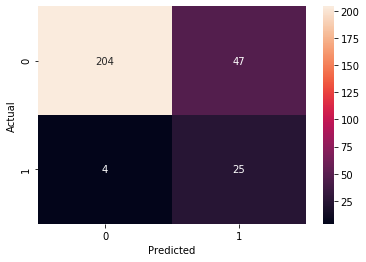

when the thereshold is 0.3744960049181840


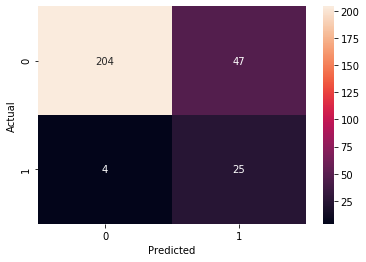

when the thereshold is 0.3744877798338585


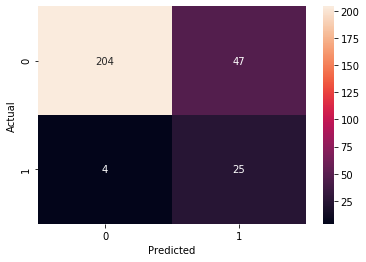

when the thereshold is 0.3709515106889157


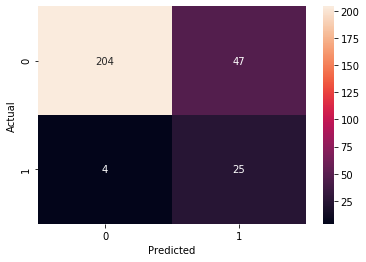

when the thereshold is 0.3701951994336420


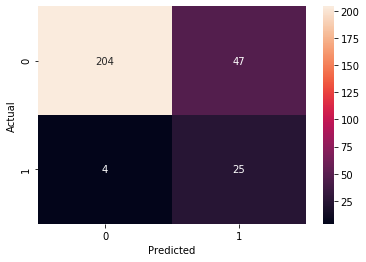

when the thereshold is 0.3689063338964952


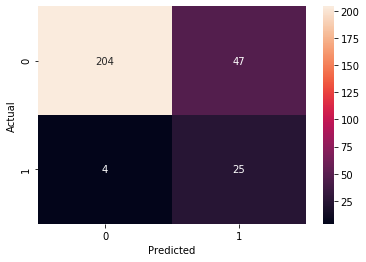

when the thereshold is 0.3686049285383198


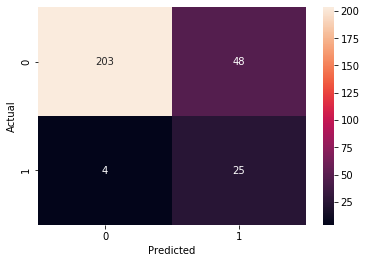

when the thereshold is 0.3627215272917567


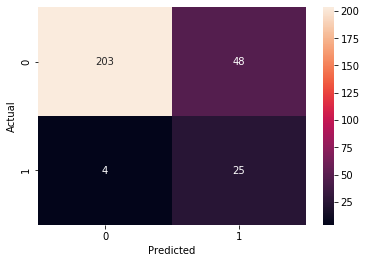

when the thereshold is 0.3432727103397345


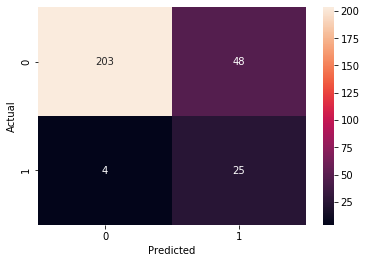

when the thereshold is 0.3404581320680150


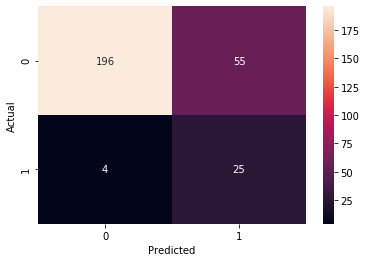

when the thereshold is 0.3400869052320966


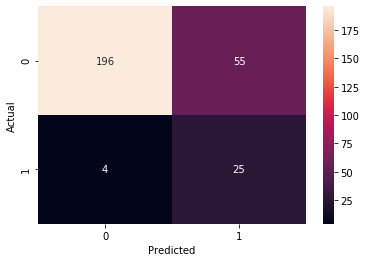

when the thereshold is 0.3383748834452887


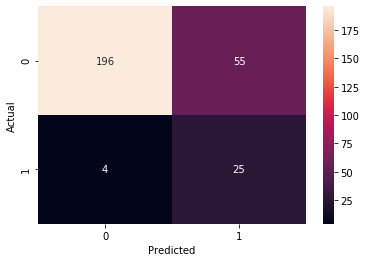

when the thereshold is 0.3338219572135297


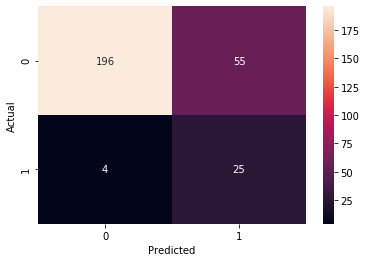

when the thereshold is 0.3322116246230564


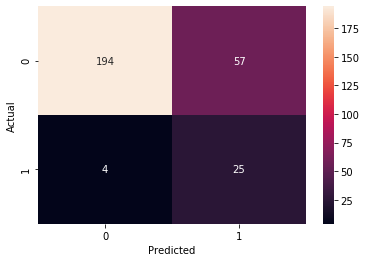

when the thereshold is 0.3312203924094822


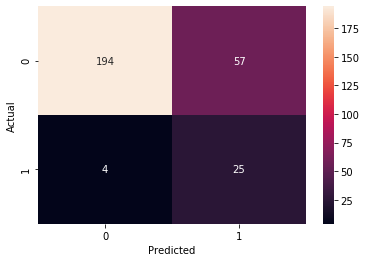

when the thereshold is 0.3309786628197579


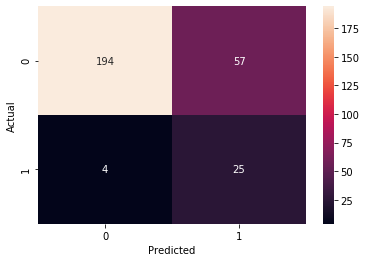

when the thereshold is 0.3292233137234385


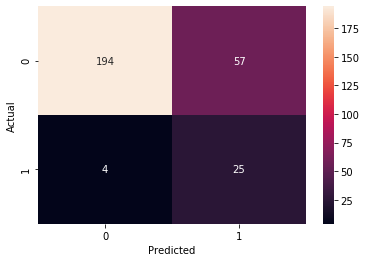

when the thereshold is 0.3143333077857131


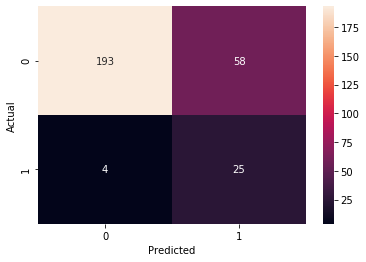

when the thereshold is 0.3117176560528480


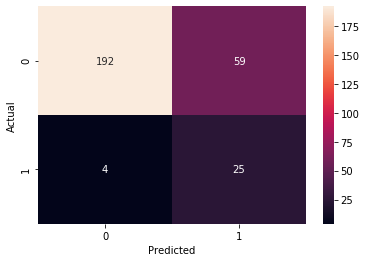

when the thereshold is 0.3112898410194861


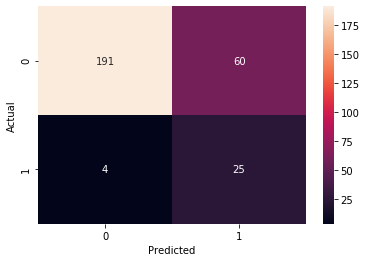

when the thereshold is 0.3091916792250509


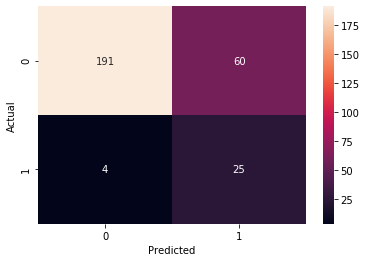

when the thereshold is 0.2922112107219981


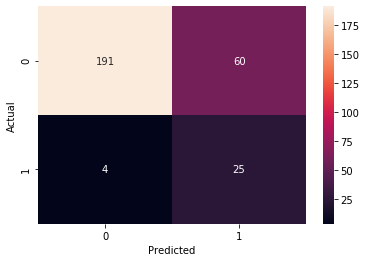

when the thereshold is 0.2793100677443265


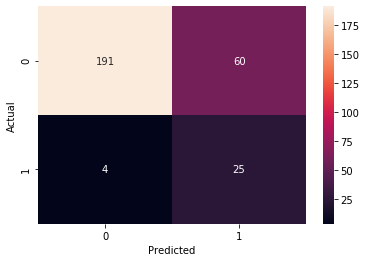

when the thereshold is 0.2751380085552198


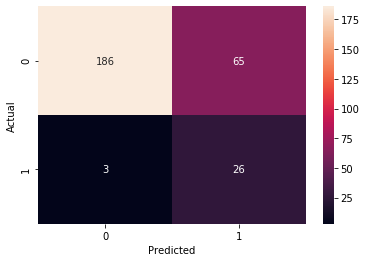

when the thereshold is 0.2726329851308117


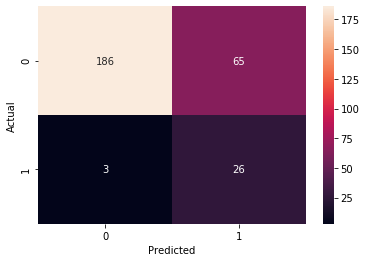

when the thereshold is 0.2557994777318866


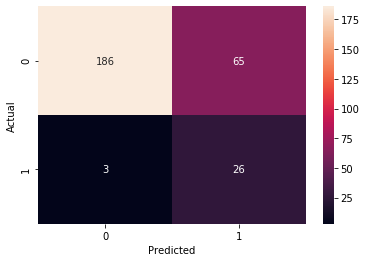

when the thereshold is 0.2549758072346167


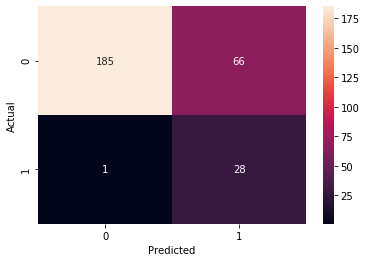

when the thereshold is 0.2500254754037841


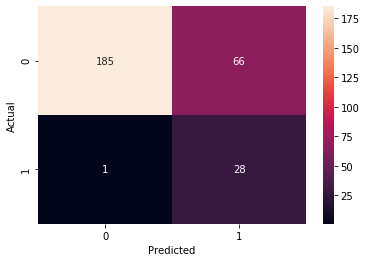

when the thereshold is 0.2465720946031095


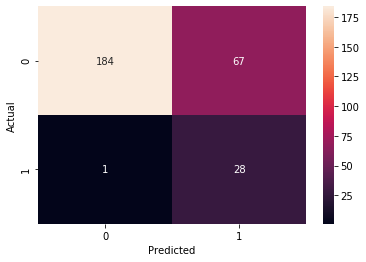

when the thereshold is 0.2447224484001881


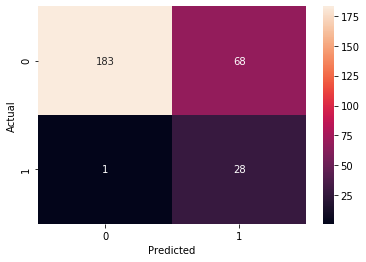

when the thereshold is 0.2429310837369555


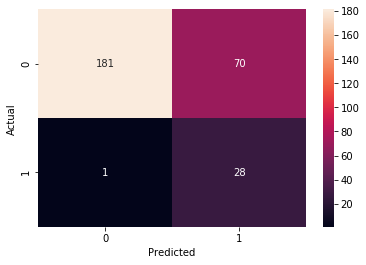

when the thereshold is 0.2418927063234869


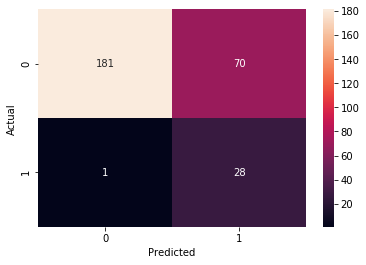

when the thereshold is 0.2383720046418501


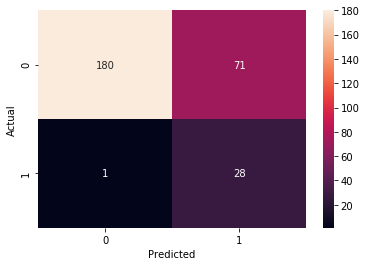

when the thereshold is 0.2359396375567865


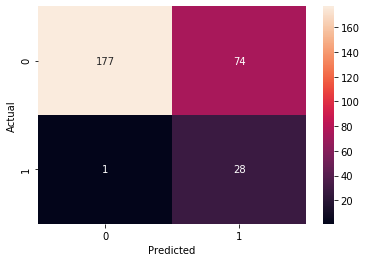

when the thereshold is 0.2324721393739328


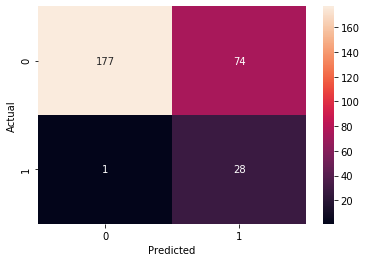

when the thereshold is 0.2295567469046106


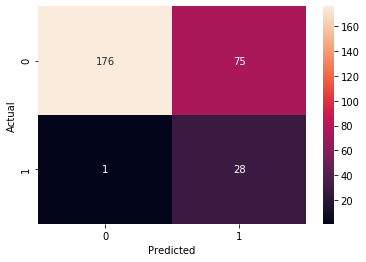

when the thereshold is 0.2281316236492223


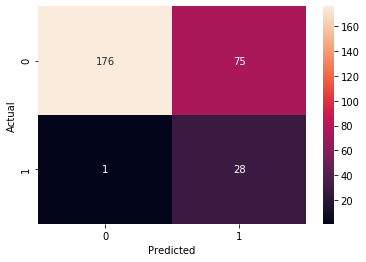

when the thereshold is 0.2264176988051071


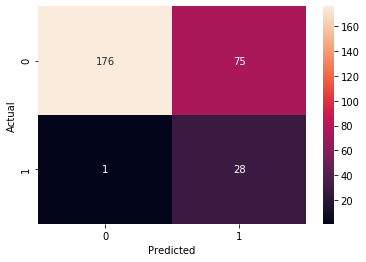

when the thereshold is 0.2127893957658916


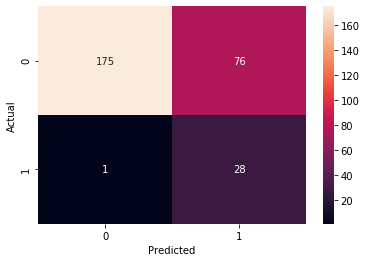

when the thereshold is 0.2118517667955611


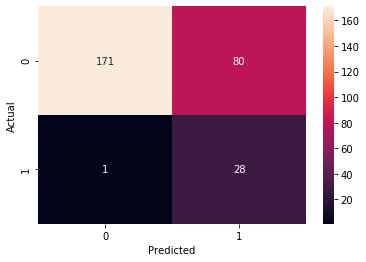

when the thereshold is 0.2091651766492408


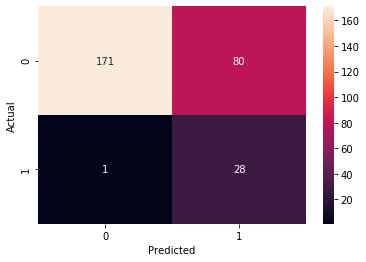

when the thereshold is 0.2077406380241359


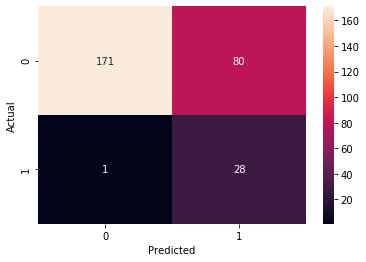

when the thereshold is 0.2074671961729134


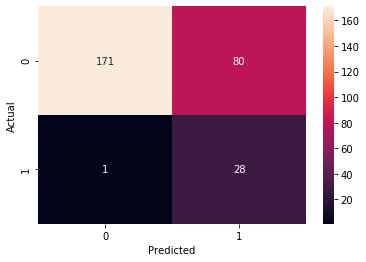

when the thereshold is 0.2065024716074554


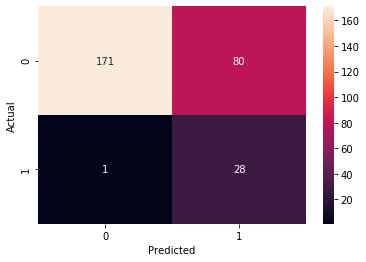

when the thereshold is 0.1960288081603519


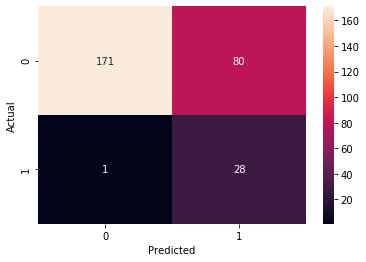

when the thereshold is 0.1947479459390691


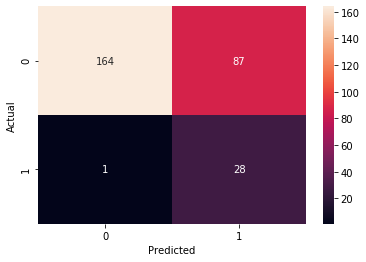

when the thereshold is 0.1912284116023931


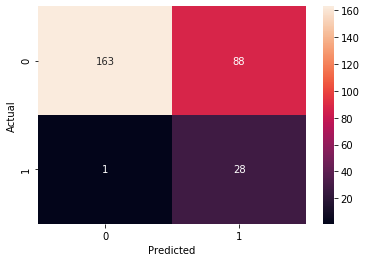

when the thereshold is 0.1895909771419856


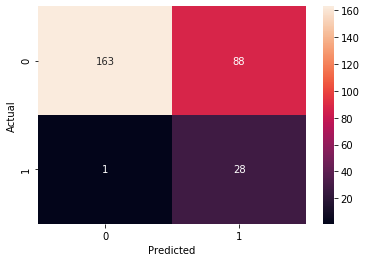

when the thereshold is 0.1895044967798953


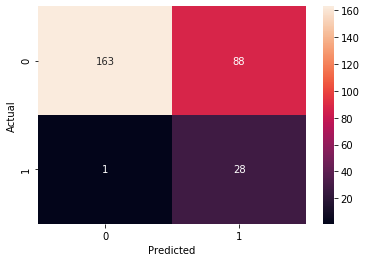

when the thereshold is 0.1888691832715248


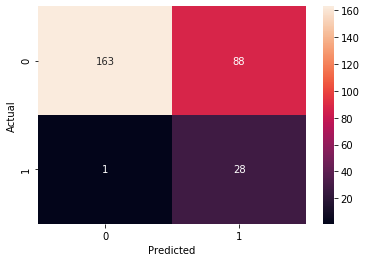

when the thereshold is 0.1877448250116519


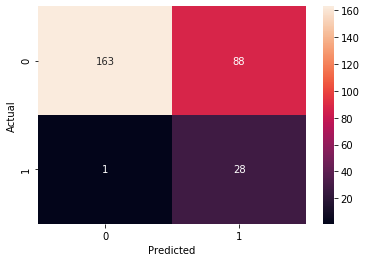

when the thereshold is 0.1876650140224740


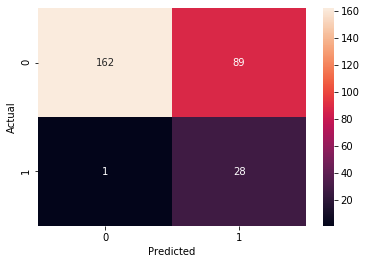

when the thereshold is 0.1840284449589946


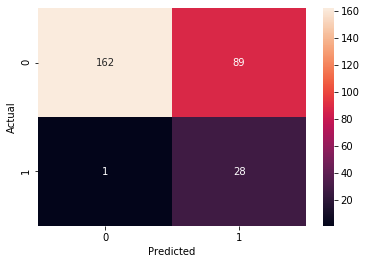

when the thereshold is 0.1839708333650977


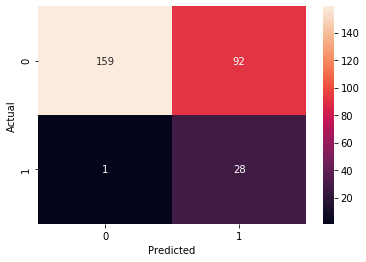

when the thereshold is 0.1765451821442240


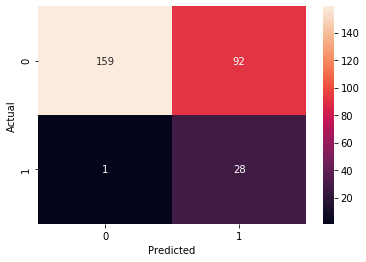

when the thereshold is 0.1763279557433107


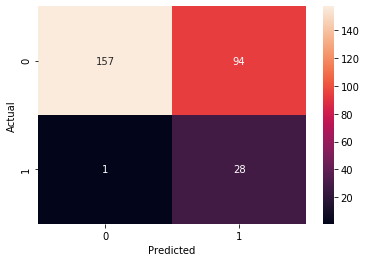

when the thereshold is 0.1675110860776458


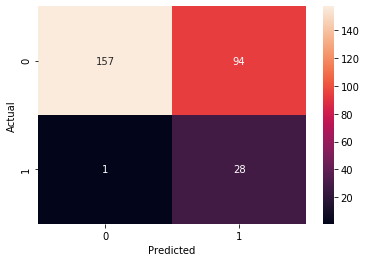

when the thereshold is 0.1674143731168210


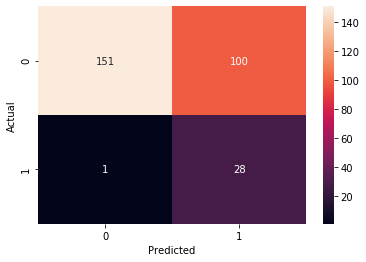

when the thereshold is 0.1651068133096829


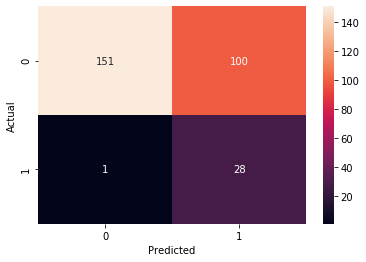

when the thereshold is 0.1643533857034848


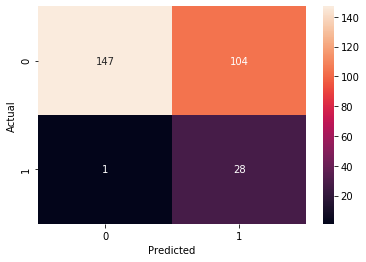

when the thereshold is 0.1633193981193606


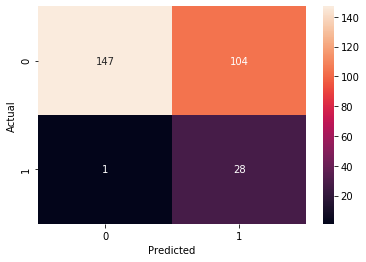

when the thereshold is 0.1631872410279415


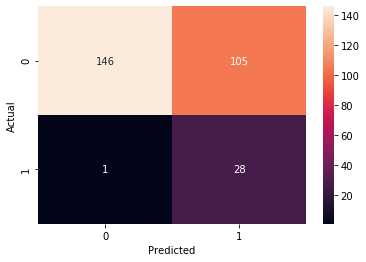

when the thereshold is 0.1621653092911295


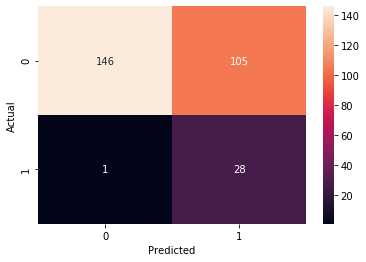

when the thereshold is 0.1619088513467666


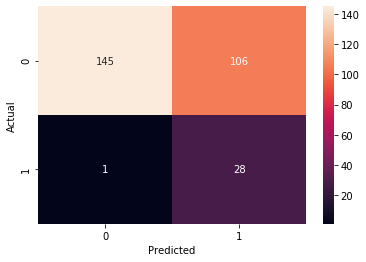

when the thereshold is 0.1570642802881685


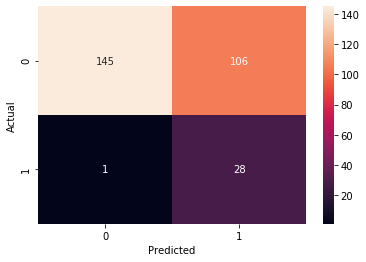

when the thereshold is 0.1540663338941772


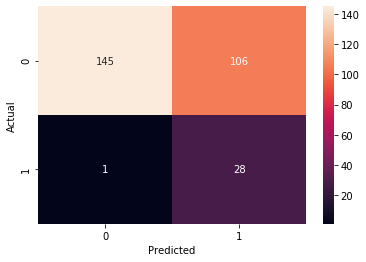

when the thereshold is 0.1487678205327068


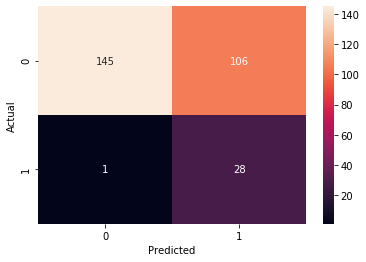

when the thereshold is 0.1487585405224552


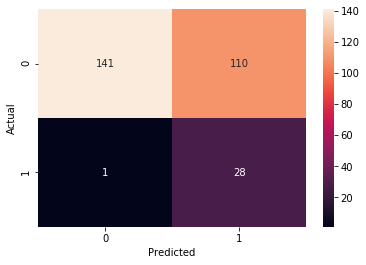

when the thereshold is 0.1486727804648075


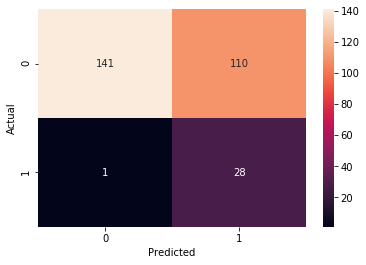

when the thereshold is 0.1484979174334996


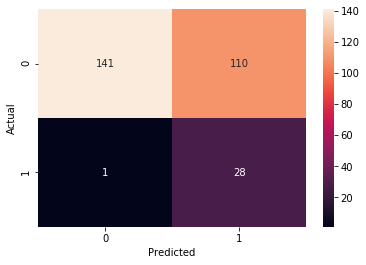

when the thereshold is 0.1476802397398396


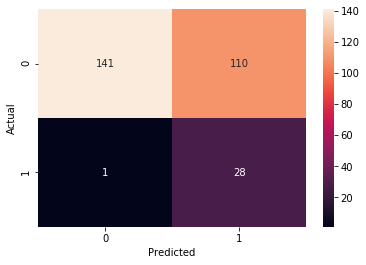

when the thereshold is 0.1471681461364583


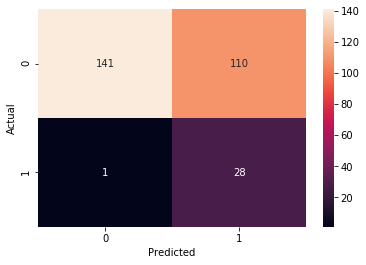

when the thereshold is 0.1383870062922848


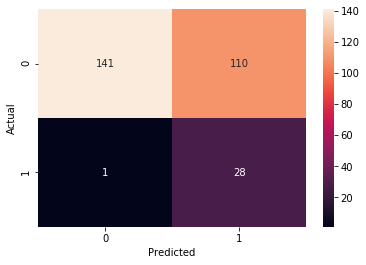

when the thereshold is 0.1378841675818090


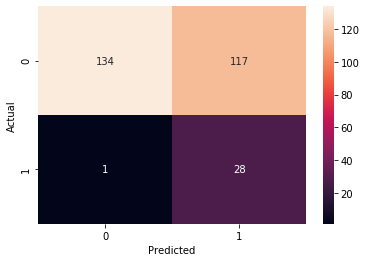

when the thereshold is 0.1378377290162263


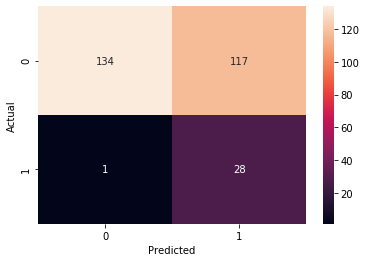

when the thereshold is 0.1341960246791901


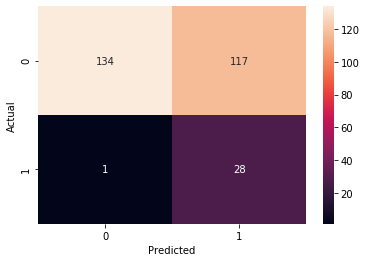

when the thereshold is 0.1340054094445719


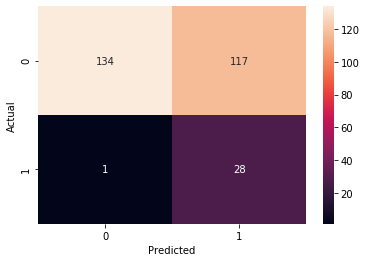

when the thereshold is 0.1299016707845370


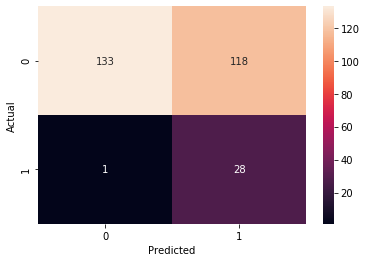

when the thereshold is 0.1293044651387558


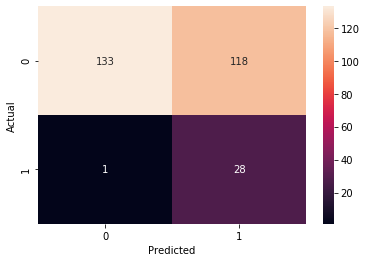

when the thereshold is 0.1288352153124628


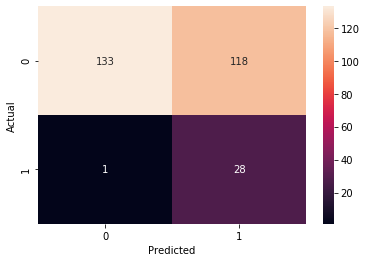

when the thereshold is 0.1274845772006579


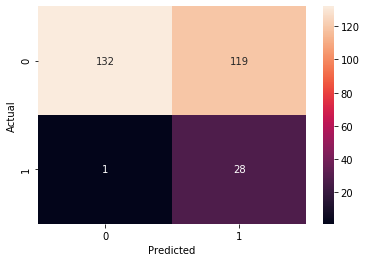

when the thereshold is 0.1253508051694407


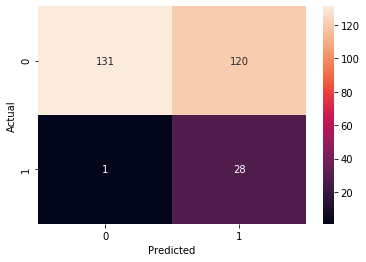

when the thereshold is 0.1251535360765315


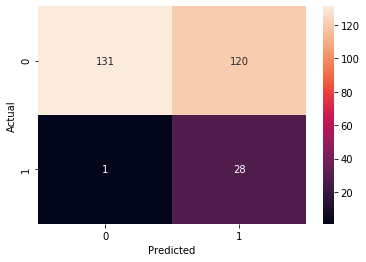

when the thereshold is 0.1120684408991725


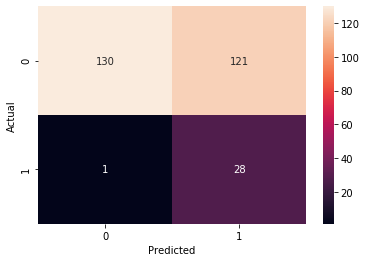

when the thereshold is 0.1108280987562173


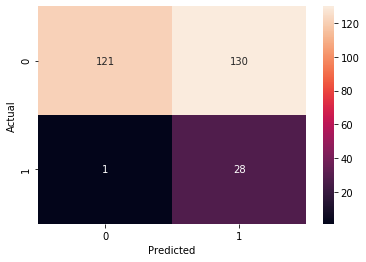

when the thereshold is 0.1078803433811587


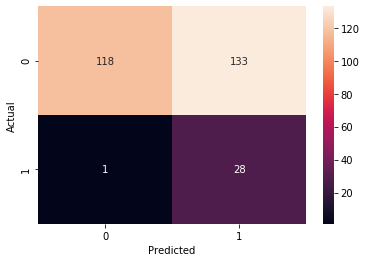

when the thereshold is 0.1077678341546838


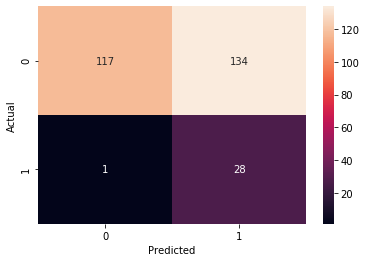

when the thereshold is 0.1028645136617235


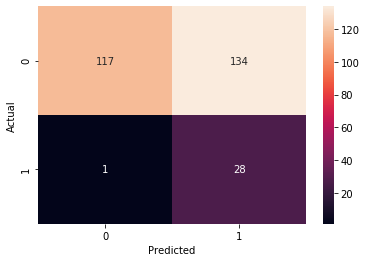

when the thereshold is 0.1027429621284255


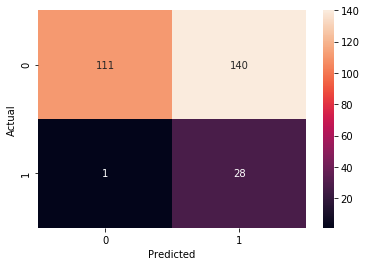

when the thereshold is 0.1012090087692848


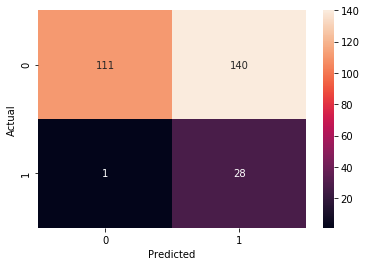

when the thereshold is 0.1011832282832628


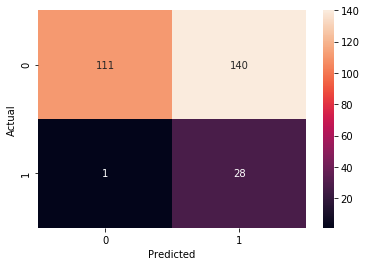

when the thereshold is 0.0992204977687255


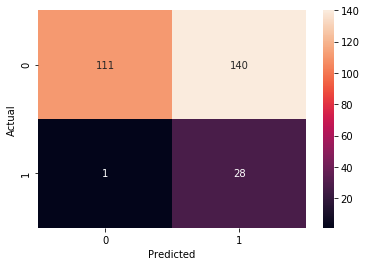

when the thereshold is 0.0990274556197295


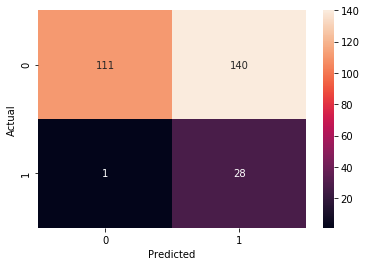

when the thereshold is 0.0989396410611716


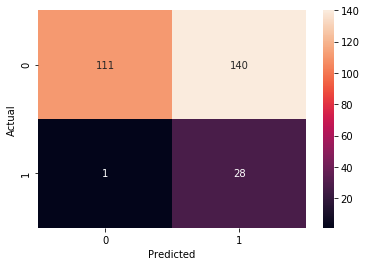

when the thereshold is 0.0976830856040793


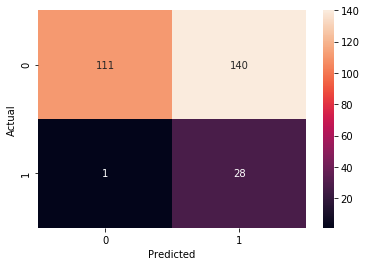

when the thereshold is 0.0944005047078453


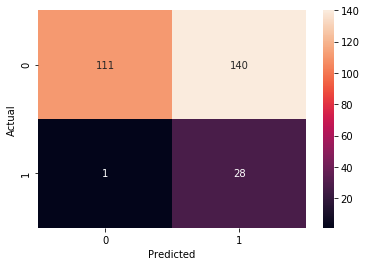

when the thereshold is 0.0943787112451024


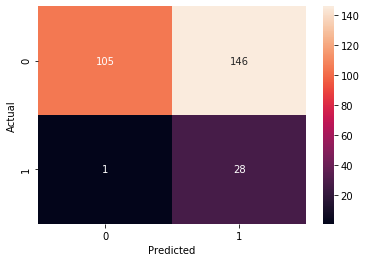

when the thereshold is 0.0939017290715241


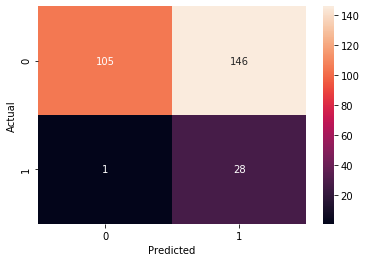

when the thereshold is 0.0931818883058101


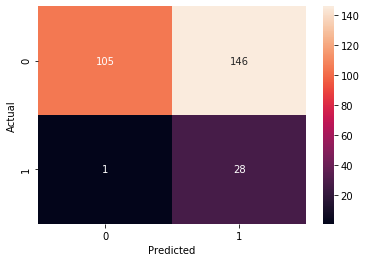

when the thereshold is 0.0859115125159520


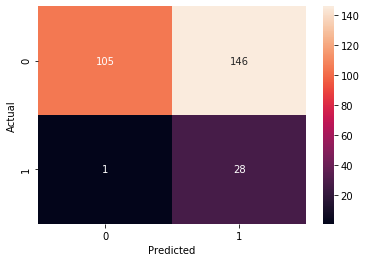

when the thereshold is 0.0858242446979191


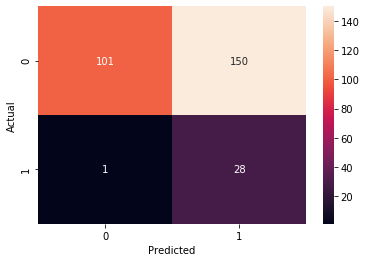

when the thereshold is 0.0782305497292331


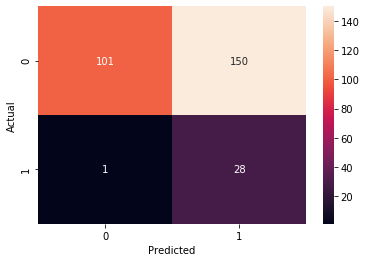

when the thereshold is 0.0781724376754507


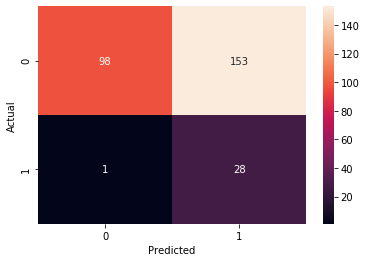

when the thereshold is 0.0768753463050487


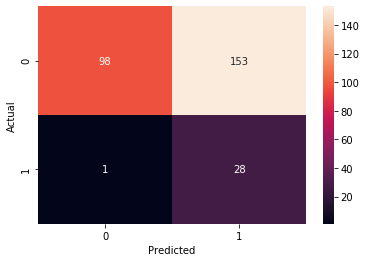

when the thereshold is 0.0768173264119037


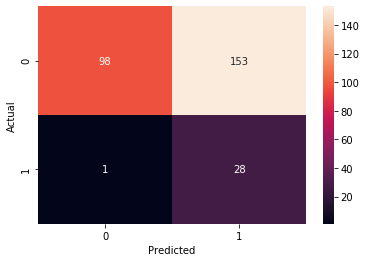

when the thereshold is 0.0749507854113924


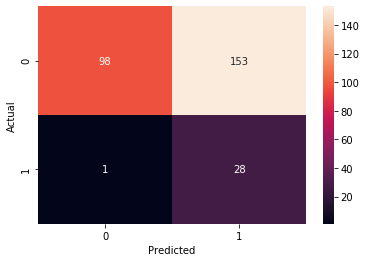

when the thereshold is 0.0748987792059017


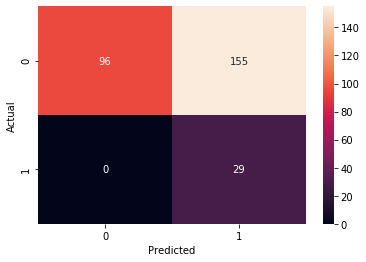

when the thereshold is 0.0748369027258978


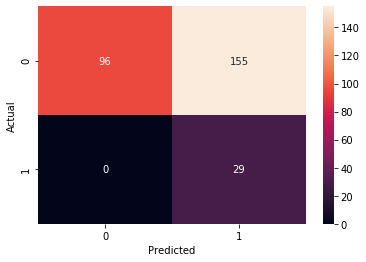

when the thereshold is 0.0735654596625865


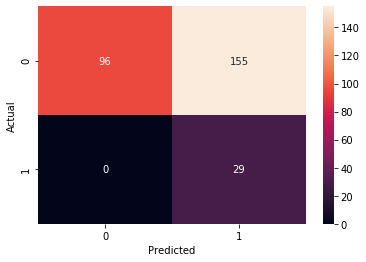

when the thereshold is 0.0733474659559274


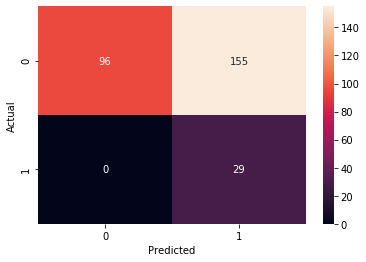

when the thereshold is 0.0731766471158961


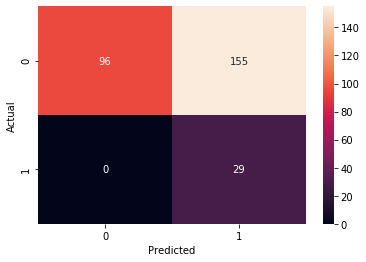

when the thereshold is 0.0731399786141355


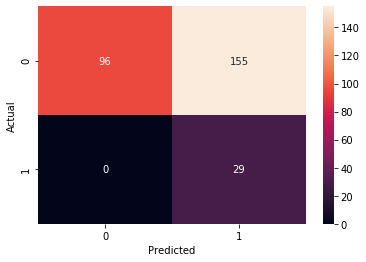

when the thereshold is 0.0730901025863358


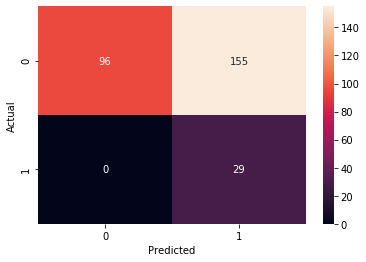

when the thereshold is 0.0730698820694563


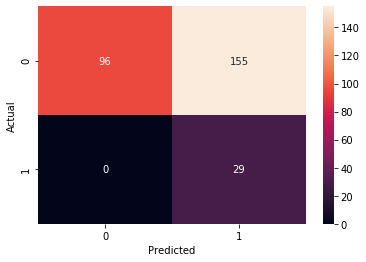

when the thereshold is 0.0730408426495607


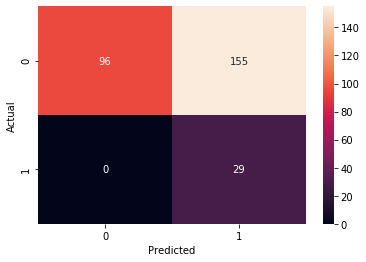

when the thereshold is 0.0729436117411006


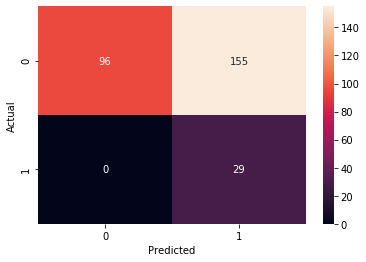

when the thereshold is 0.0726734123727913


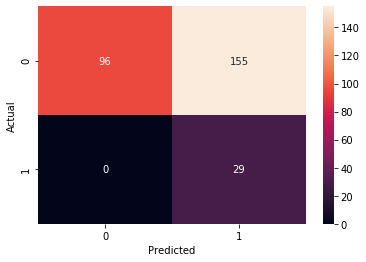

when the thereshold is 0.0724549693483166


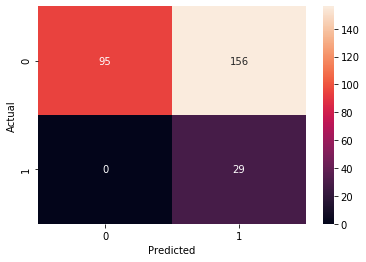

when the thereshold is 0.0724033571850502


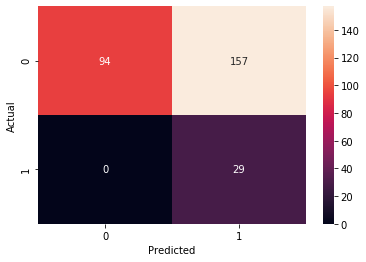

when the thereshold is 0.0723898600417381


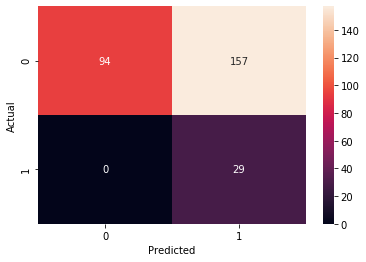

when the thereshold is 0.0723807807308153


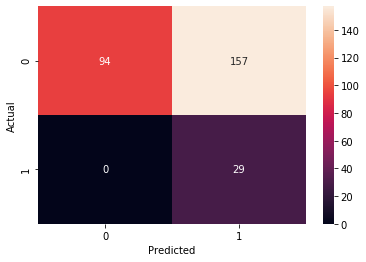

when the thereshold is 0.0723438867728436


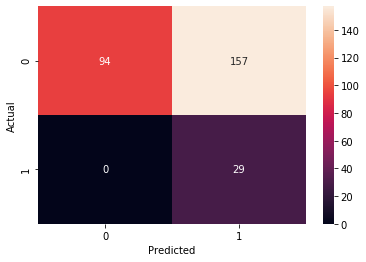

when the thereshold is 0.0723284409914219


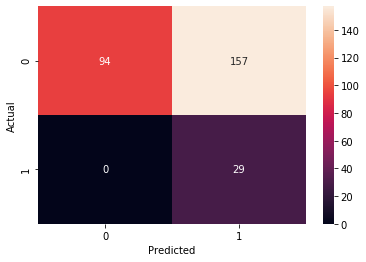

when the thereshold is 0.0721800846215588


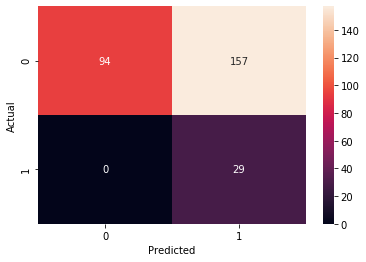

when the thereshold is 0.0721263083850075


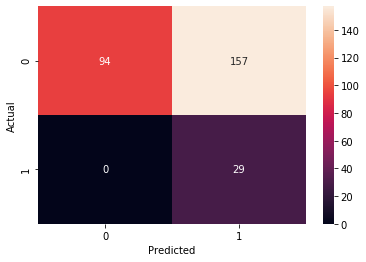

when the thereshold is 0.0721234291376632


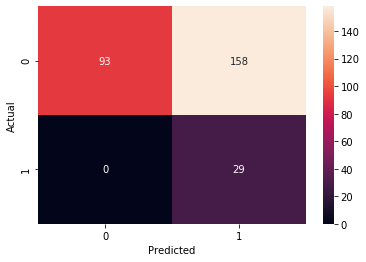

when the thereshold is 0.0720876529628857


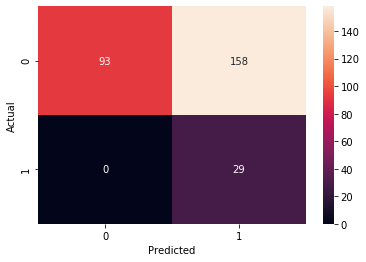

when the thereshold is 0.0720049437528806


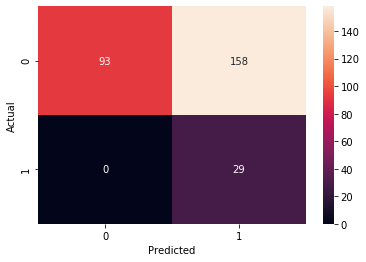

when the thereshold is 0.0719536068544848


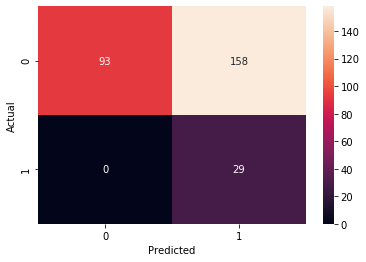

when the thereshold is 0.0697703731456684


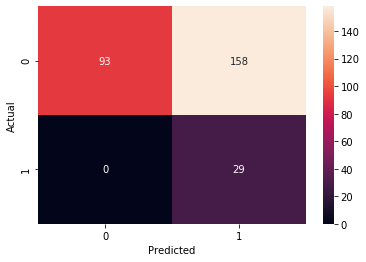

when the thereshold is 0.0697442083648394


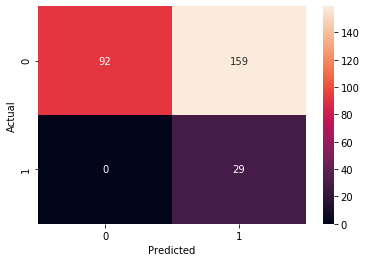

when the thereshold is 0.0697393868281592


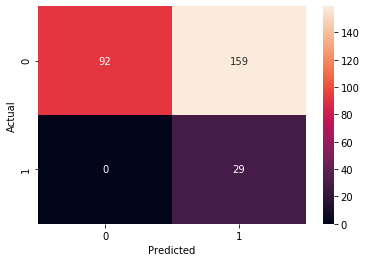

when the thereshold is 0.0697145651419990


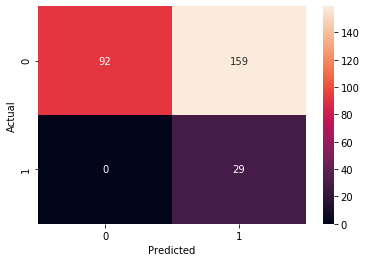

when the thereshold is 0.0683647884169050


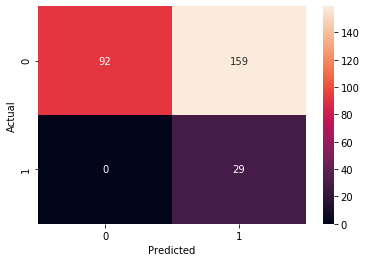

when the thereshold is 0.0679143493206513


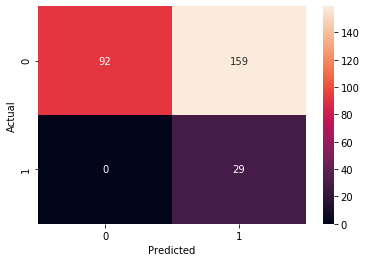

when the thereshold is 0.0672743137311827


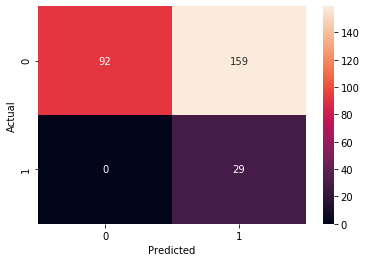

when the thereshold is 0.0671254751181651


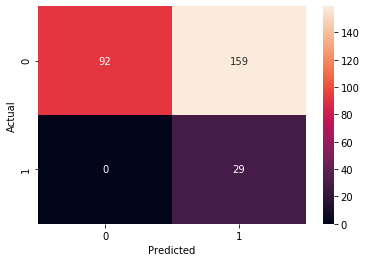

when the thereshold is 0.0658431456083080


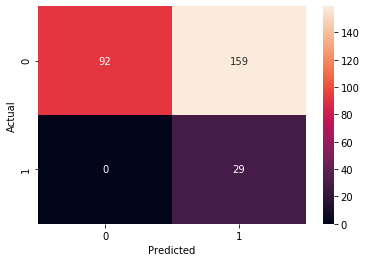

when the thereshold is 0.0654577813030667


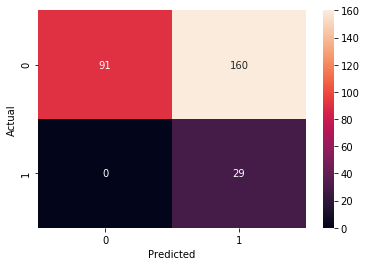

when the thereshold is 0.0652511932721774


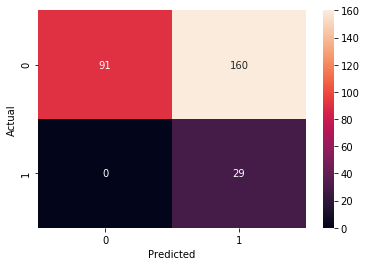

when the thereshold is 0.0652267624082364


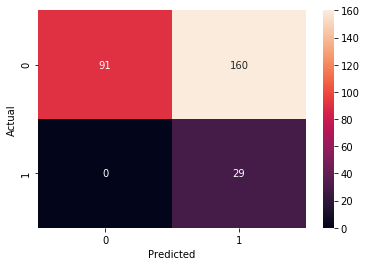

when the thereshold is 0.0625627441107755


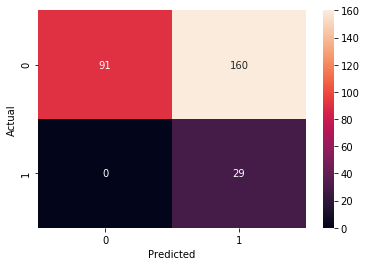

when the thereshold is 0.0619457849258478


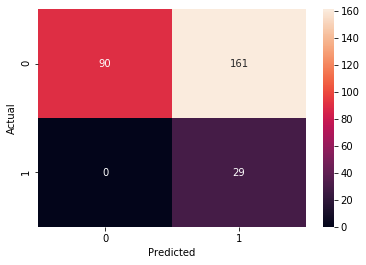

when the thereshold is 0.0610999357933250


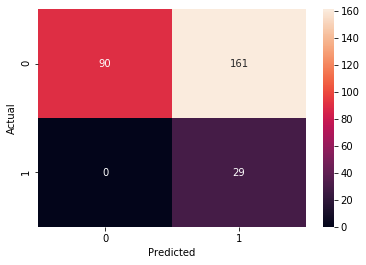

when the thereshold is 0.0608610214301854


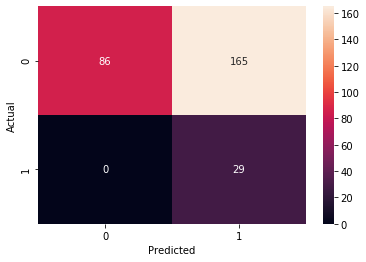

when the thereshold is 0.0588207467143591


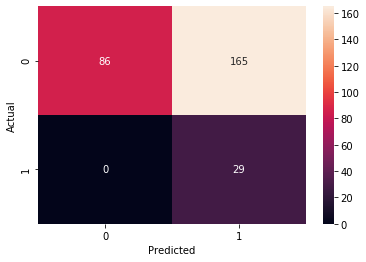

when the thereshold is 0.0584110179639265


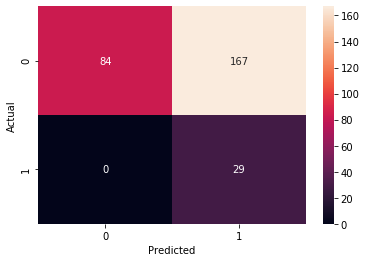

when the thereshold is 0.0544398484910232


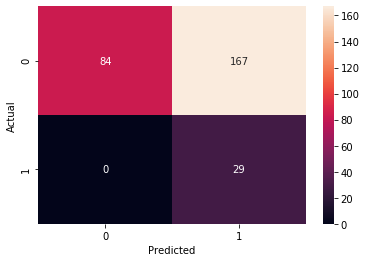

when the thereshold is 0.0540034915176109


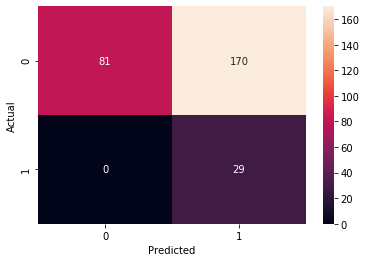

when the thereshold is 0.0537956999044663


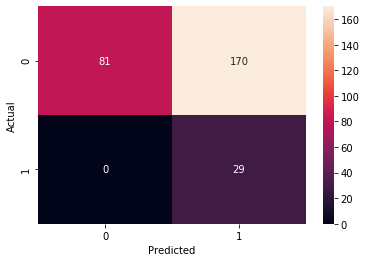

when the thereshold is 0.0537632097553897


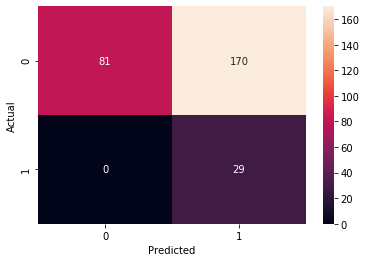

when the thereshold is 0.0533650838065074


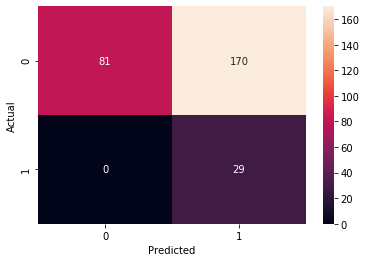

when the thereshold is 0.0533466597725196


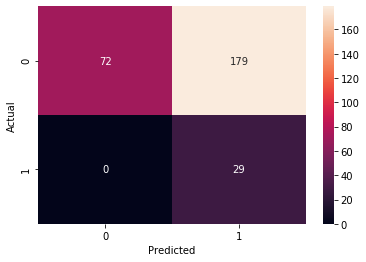

when the thereshold is 0.0530612571474681


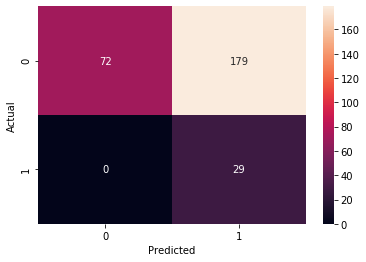

when the thereshold is 0.0529146582364875


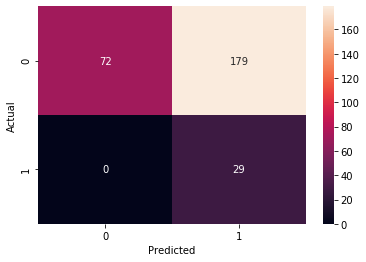

when the thereshold is 0.0529091499179125


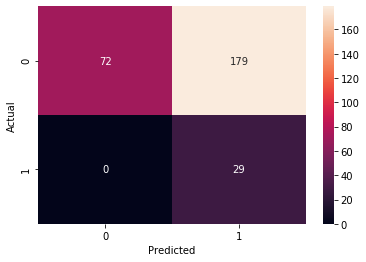

when the thereshold is 0.0510443800795189


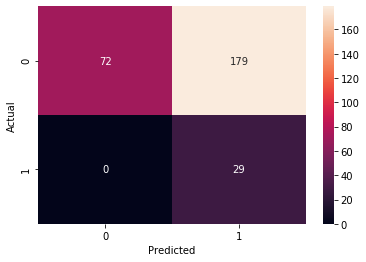

when the thereshold is 0.0510286722078421


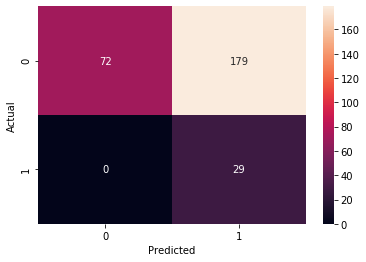

when the thereshold is 0.0508316334606133


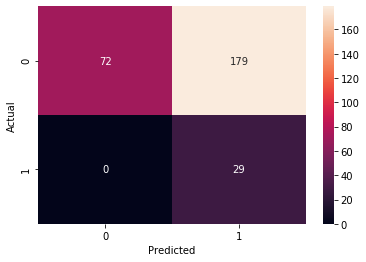

when the thereshold is 0.0507047255360784


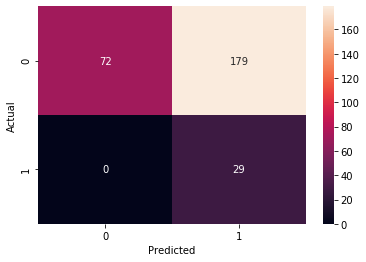

when the thereshold is 0.0504521238177955


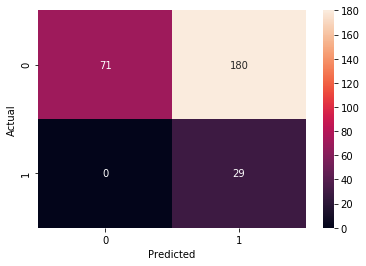

when the thereshold is 0.0490944718854754


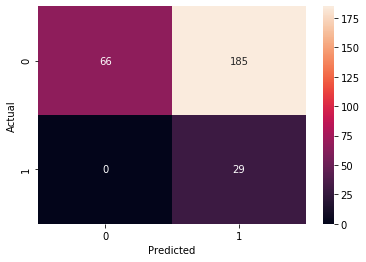

when the thereshold is 0.0489894662001677


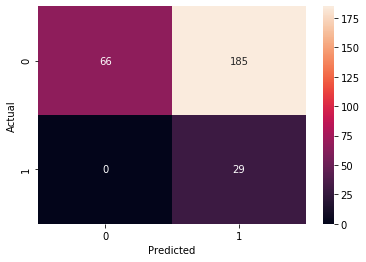

when the thereshold is 0.0485527033602673


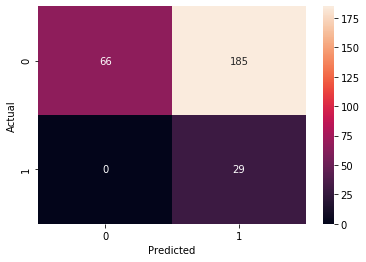

when the thereshold is 0.0485069007067176


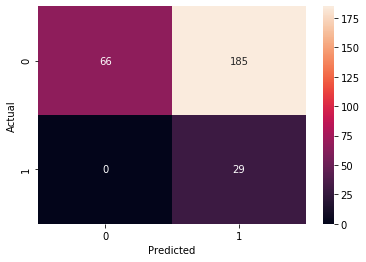

when the thereshold is 0.0477348857567797


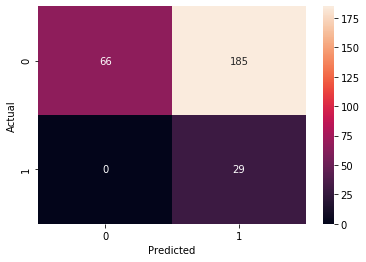

when the thereshold is 0.0475952174282713


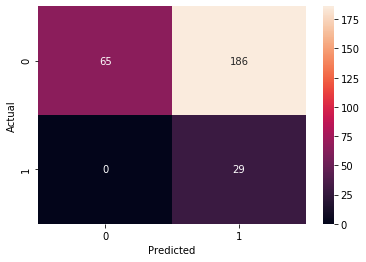

when the thereshold is 0.0457025209341192


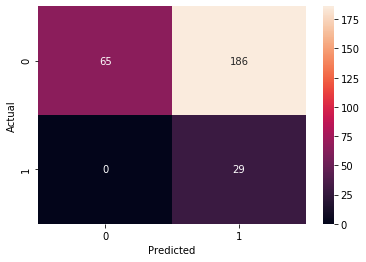

when the thereshold is 0.0456347457313060


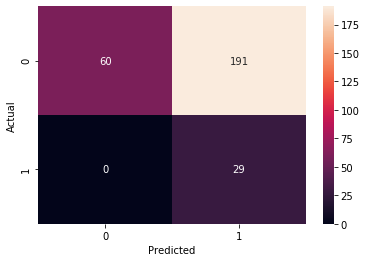

when the thereshold is 0.0440395719167694


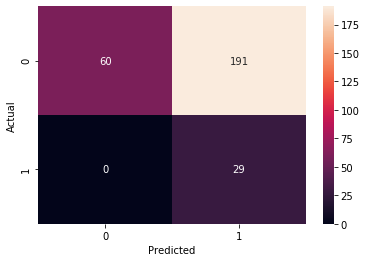

when the thereshold is 0.0439337180222779


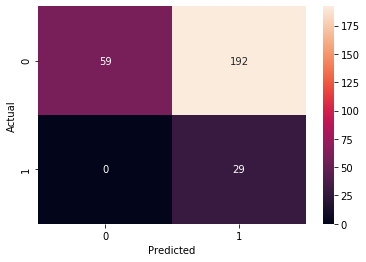

when the thereshold is 0.0438151409471791


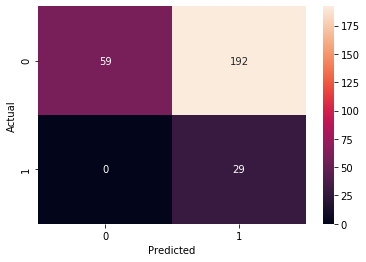

when the thereshold is 0.0437963109082471


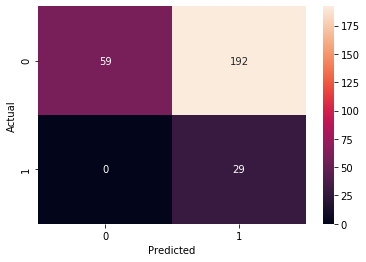

when the thereshold is 0.0430684325241707


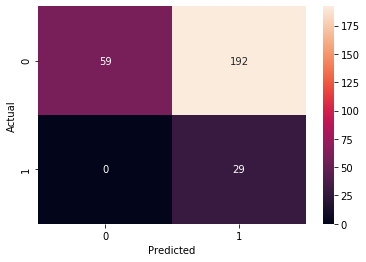

when the thereshold is 0.0430272416959532


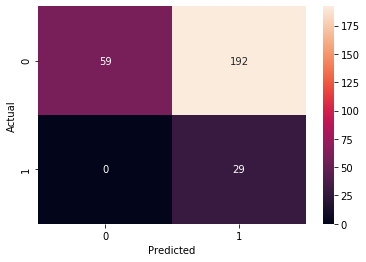

when the thereshold is 0.0426735171849254


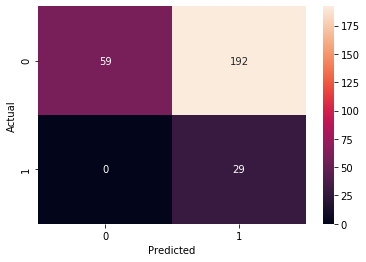

when the thereshold is 0.0426335376797535


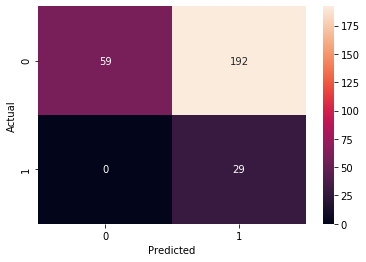

when the thereshold is 0.0426317015925876


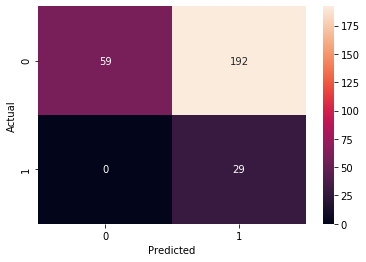

when the thereshold is 0.0425960143505130


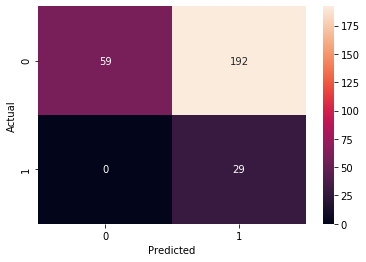

when the thereshold is 0.0423070201851184


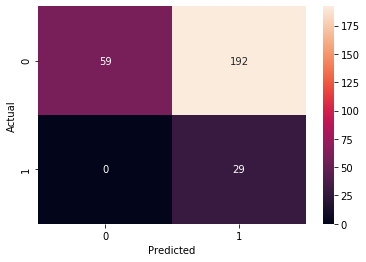

when the thereshold is 0.0422721700869815


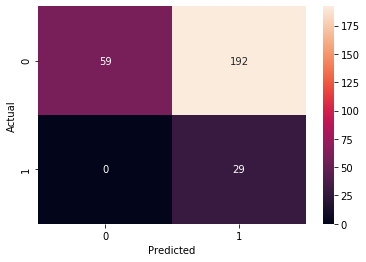

when the thereshold is 0.0421636345259143


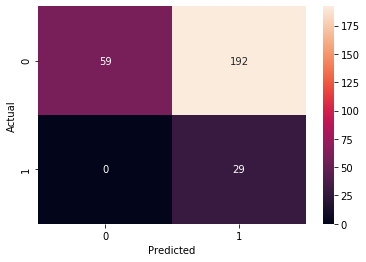

when the thereshold is 0.0421341046281746


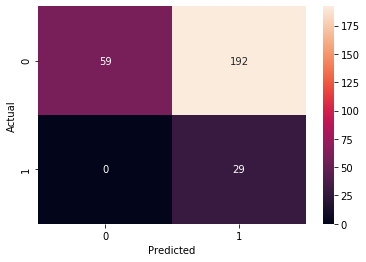

when the thereshold is 0.0421235298861593


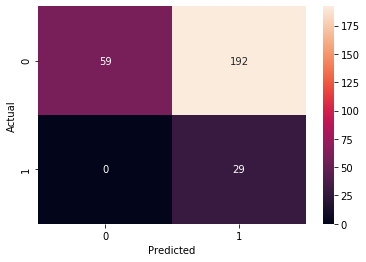

when the thereshold is 0.0420904895782383


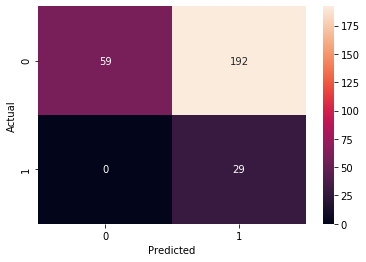

when the thereshold is 0.0418792157749492


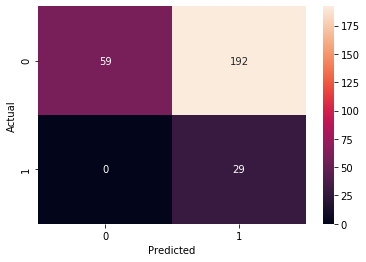

when the thereshold is 0.0418469806784213


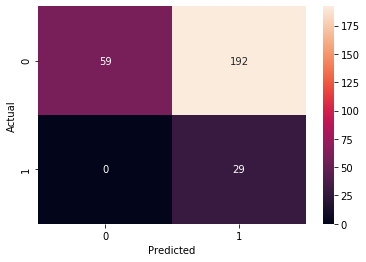

when the thereshold is 0.0417901875814210


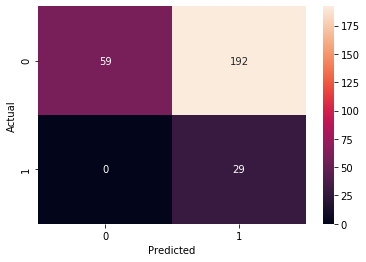

when the thereshold is 0.0417366385696671


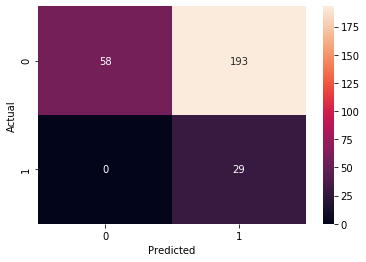

when the thereshold is 0.0407106520548229


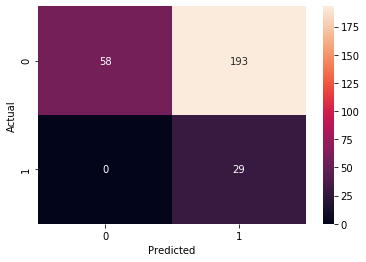

when the thereshold is 0.0407102840463886


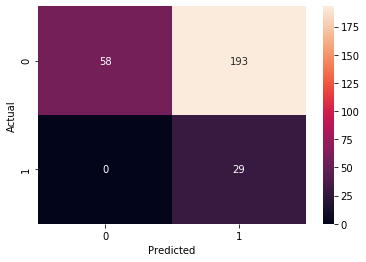

when the thereshold is 0.0394584437274582


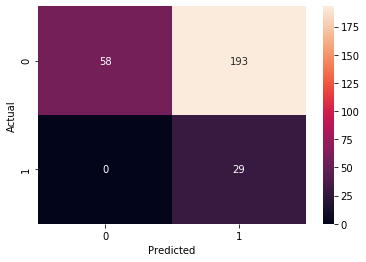

when the thereshold is 0.0393581576206200


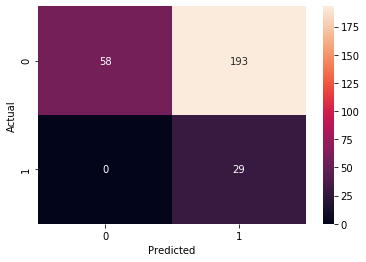

when the thereshold is 0.0389468079534241


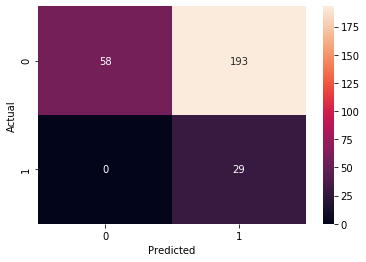

when the thereshold is 0.0389231030667456


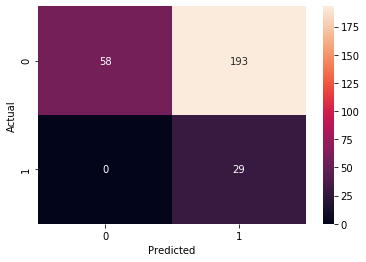

when the thereshold is 0.0385863296214717


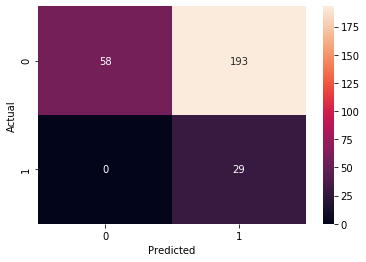

when the thereshold is 0.0385637520753096


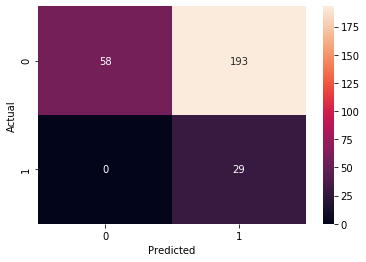

when the thereshold is 0.0374762739005396


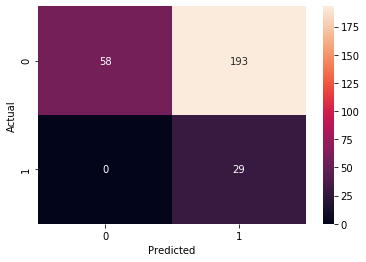

when the thereshold is 0.0374659051585733


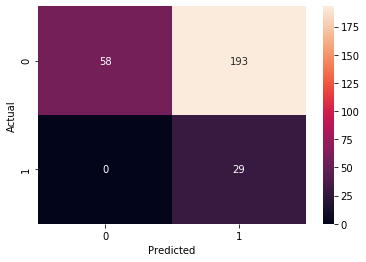

when the thereshold is 0.0363836011631376


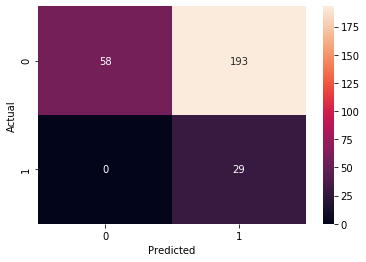

when the thereshold is 0.0363590907328664


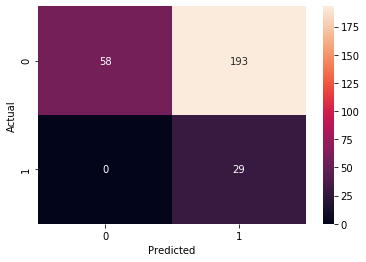

when the thereshold is 0.0360339896425554


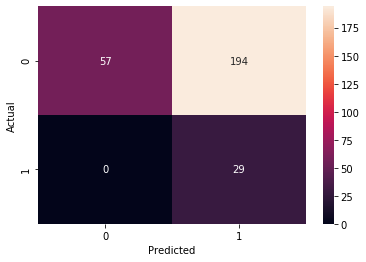

when the thereshold is 0.0359089438888020


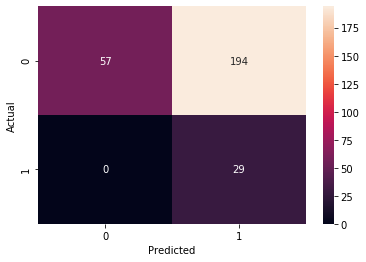

when the thereshold is 0.0320416704492239


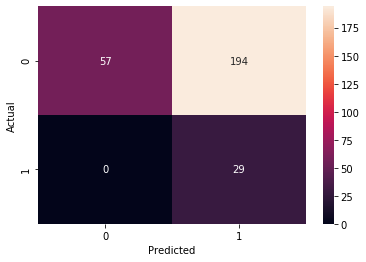

when the thereshold is 0.0320368985761405


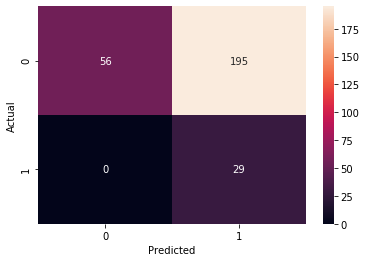

when the thereshold is 0.0320326008687160


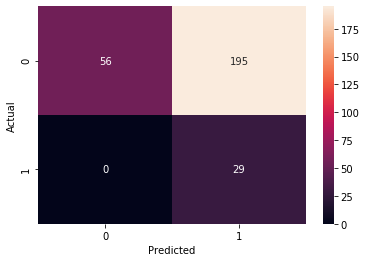

when the thereshold is 0.0319916427049070


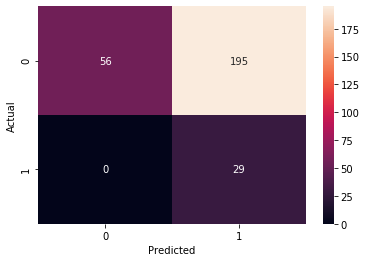

when the thereshold is 0.0316156157980236


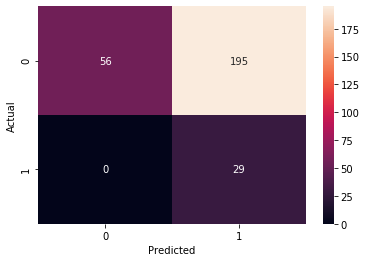

when the thereshold is 0.0316154514605798


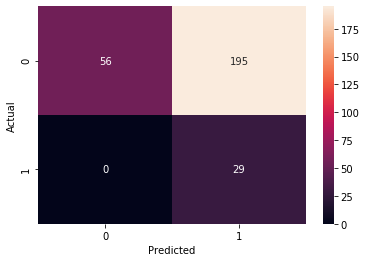

when the thereshold is 0.0313910227954820


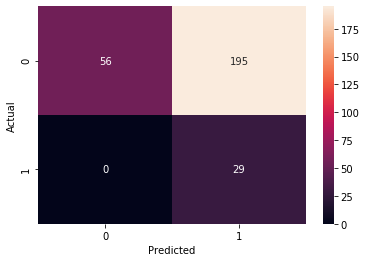

when the thereshold is 0.0313467355167550


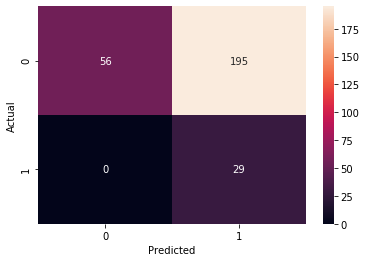

when the thereshold is 0.0312242109467045


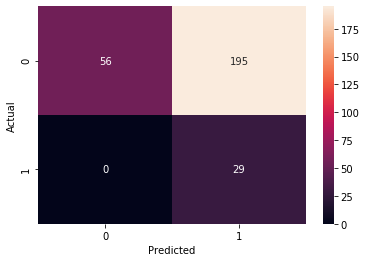

when the thereshold is 0.0312215895830054


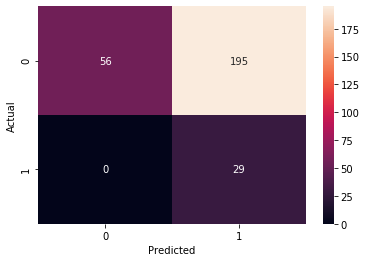

when the thereshold is 0.0306635524281471


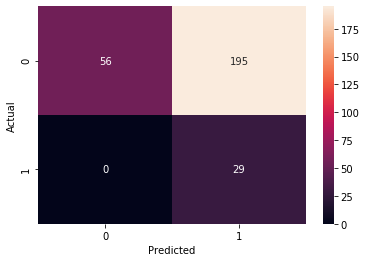

when the thereshold is 0.0305158240744316


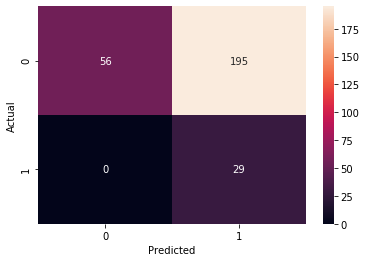

when the thereshold is 0.0301267071588586


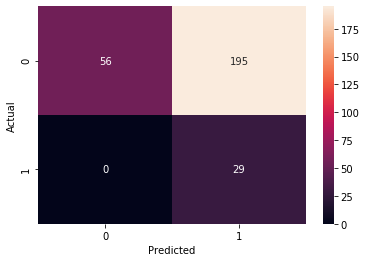

when the thereshold is 0.0301097238442963


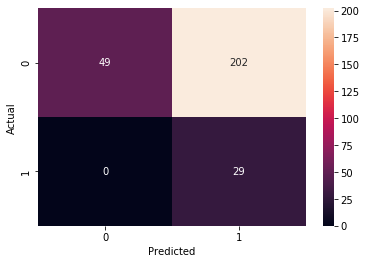

when the thereshold is 0.0301024860449464


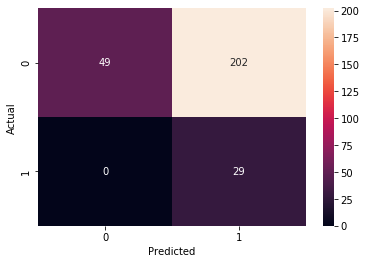

when the thereshold is 0.0300439910518670


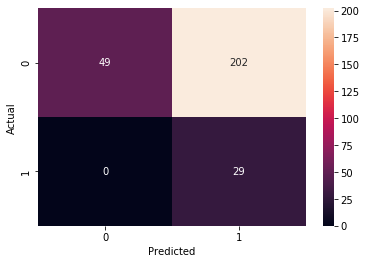

when the thereshold is 0.0299717979805411


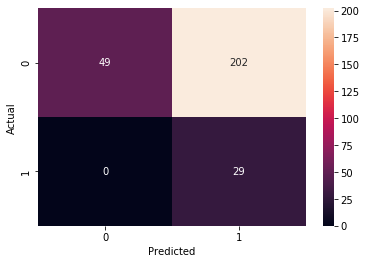

when the thereshold is 0.0299355945418083


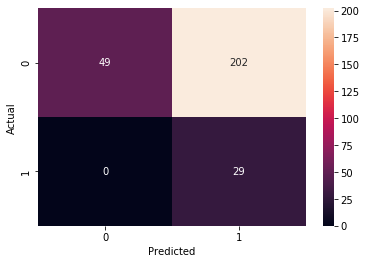

when the thereshold is 0.0299328516146367


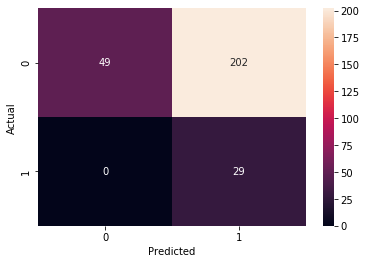

when the thereshold is 0.0298658044369802


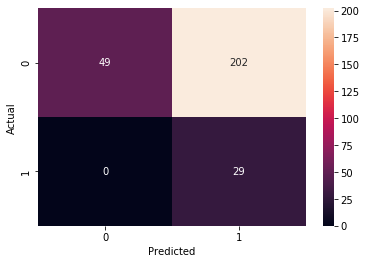

when the thereshold is 0.0298247363286994


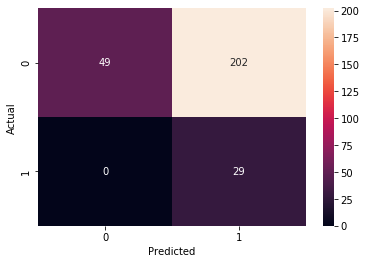

when the thereshold is 0.0298130211127829


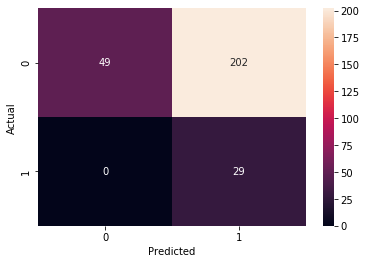

when the thereshold is 0.0297757652747849


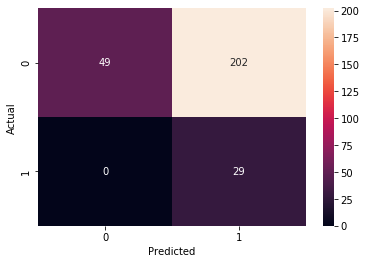

when the thereshold is 0.0293910677948125


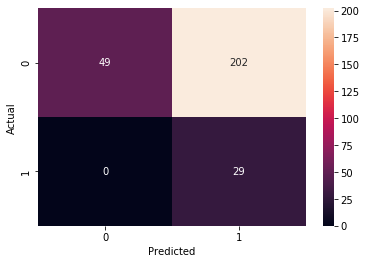

when the thereshold is 0.0293537032757861


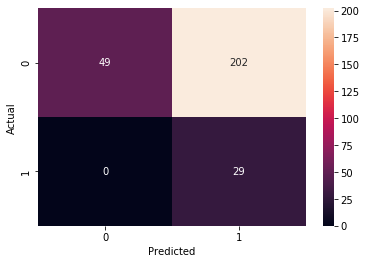

when the thereshold is 0.0291916232814776


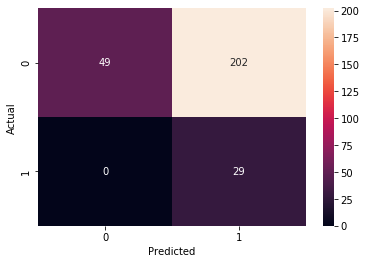

when the thereshold is 0.0291255609241923


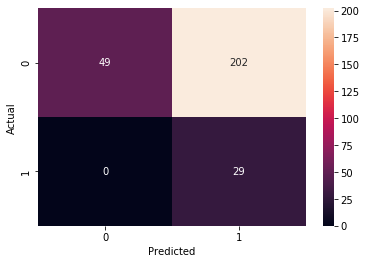

when the thereshold is 0.0291248753675007


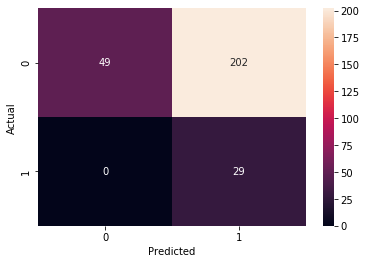

when the thereshold is 0.0290205944280214


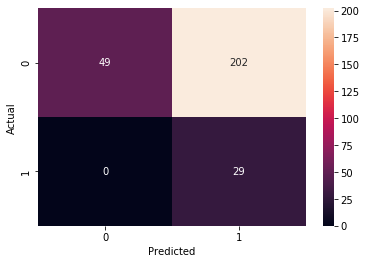

when the thereshold is 0.0288340526920073


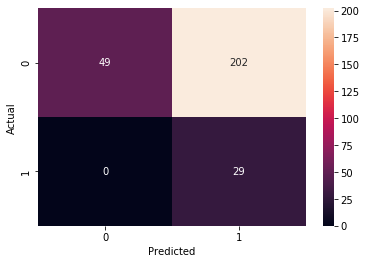

when the thereshold is 0.0288276104841727


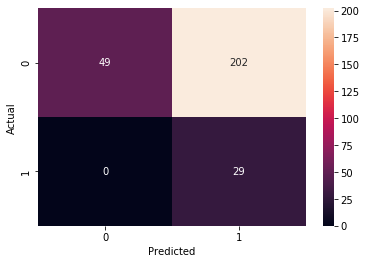

when the thereshold is 0.0287322800576152


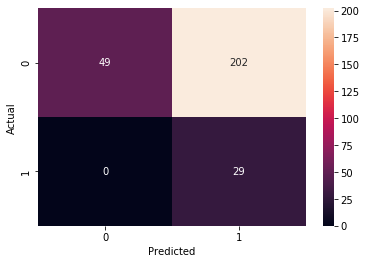

when the thereshold is 0.0286876669702438


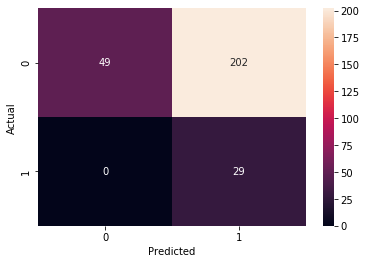

when the thereshold is 0.0286320981641376


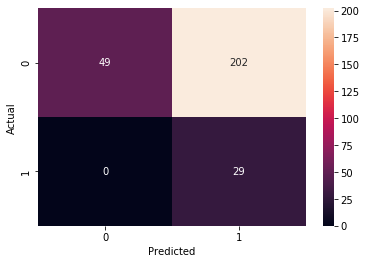

when the thereshold is 0.0286277460315694


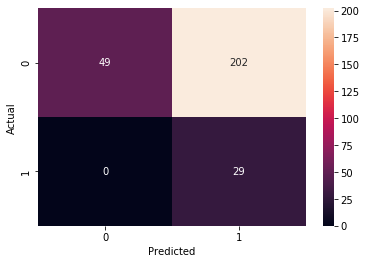

when the thereshold is 0.0285777654057189


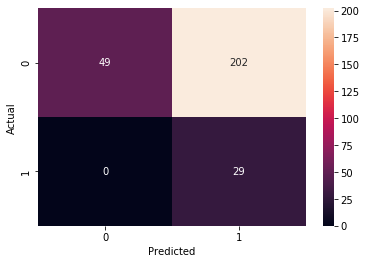

when the thereshold is 0.0285455835519398


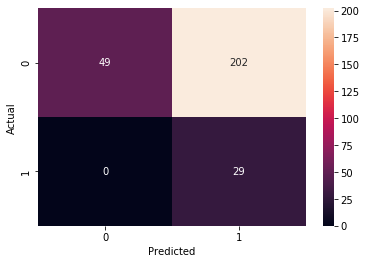

when the thereshold is 0.0284832434231343


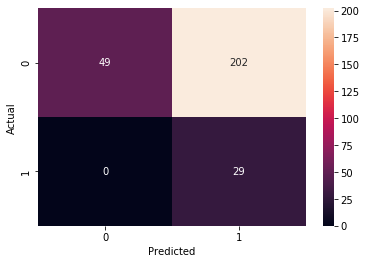

when the thereshold is 0.0284679901022897


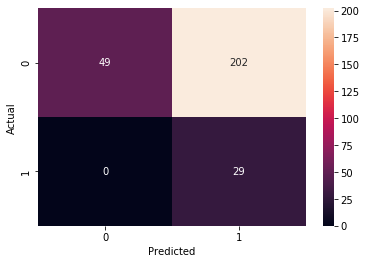

when the thereshold is 0.0283544543360281


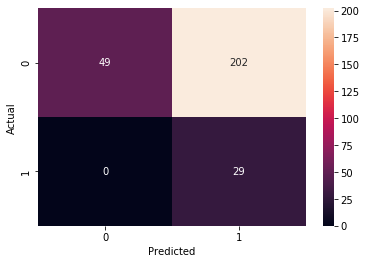

when the thereshold is 0.0278593026209102


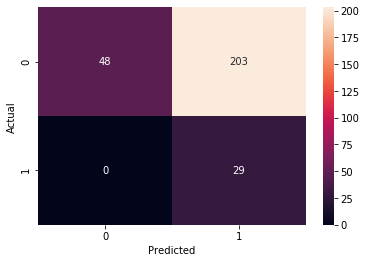

when the thereshold is 0.0278390147552461


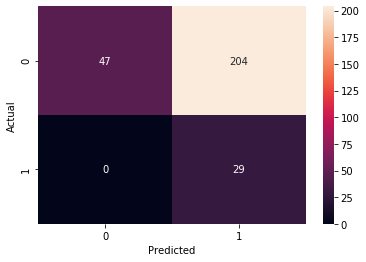

when the thereshold is 0.0278309976947850


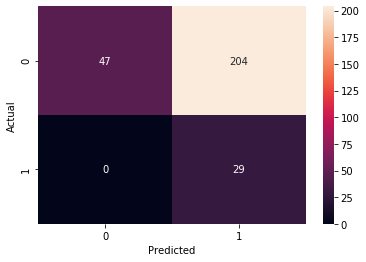

when the thereshold is 0.0278277799185211


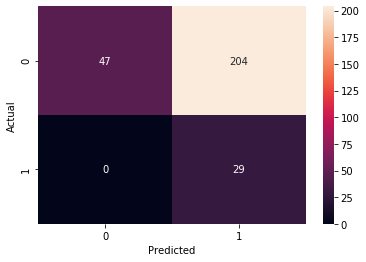

when the thereshold is 0.0278067314769688


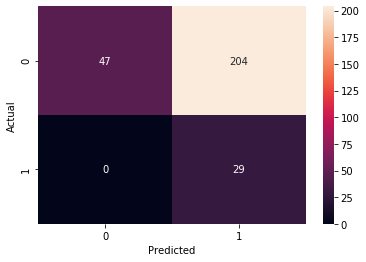

when the thereshold is 0.0277913463334485


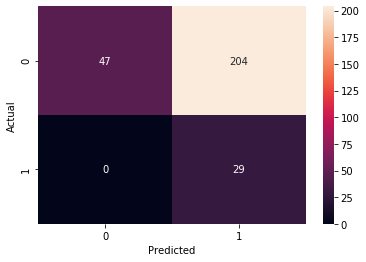

when the thereshold is 0.0277393806785685


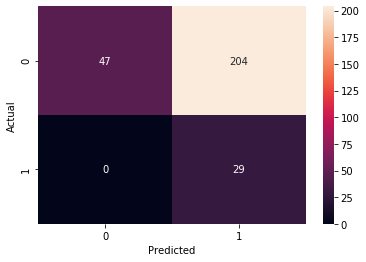

when the thereshold is 0.0277374287557984


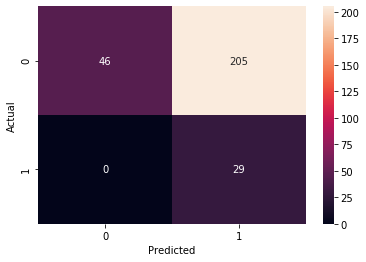

when the thereshold is 0.0277053934701457


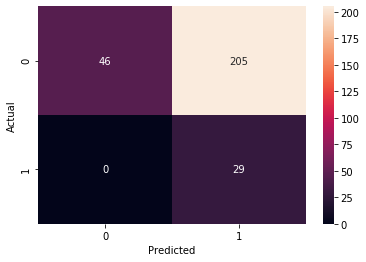

when the thereshold is 0.0276987750128918


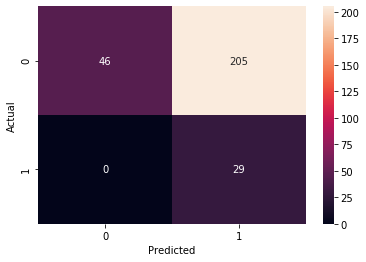

when the thereshold is 0.0267650820815442


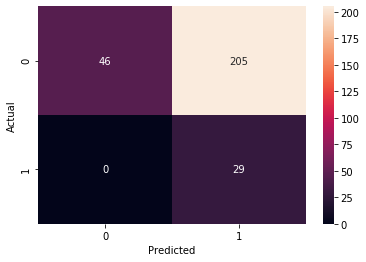

when the thereshold is 0.0267354636899417


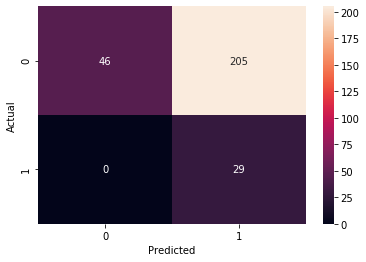

when the thereshold is 0.0263984784286521


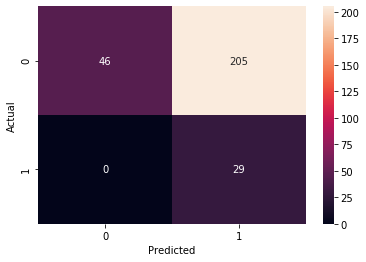

when the thereshold is 0.0261275453033235


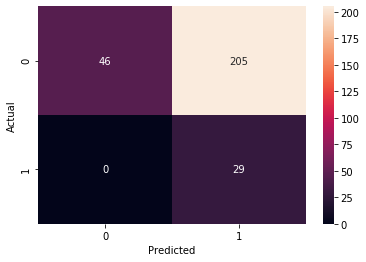

when the thereshold is 0.0258522795729785


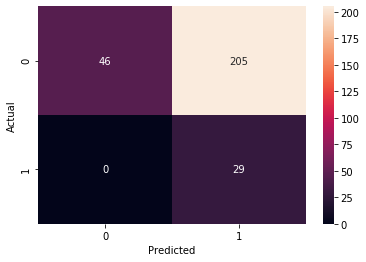

when the thereshold is 0.0257817100410489


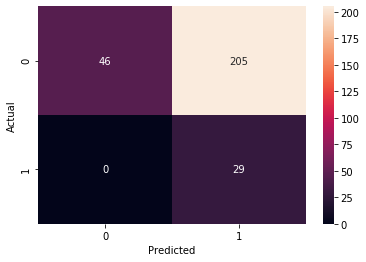

when the thereshold is 0.0254732214832940


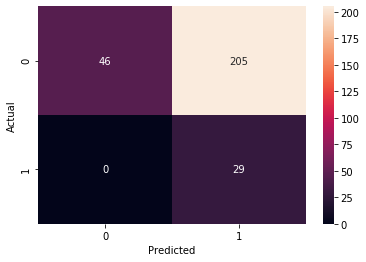

when the thereshold is 0.0254705744003484


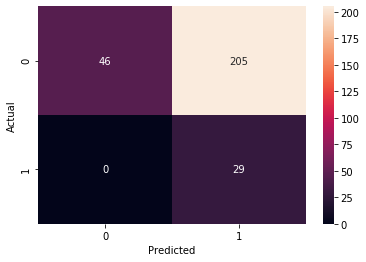

when the thereshold is 0.0252210845046187


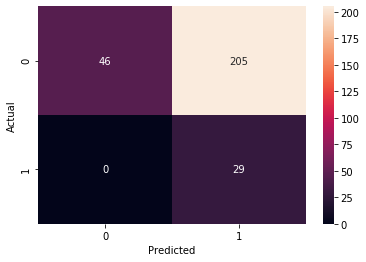

when the thereshold is 0.0252143994384914


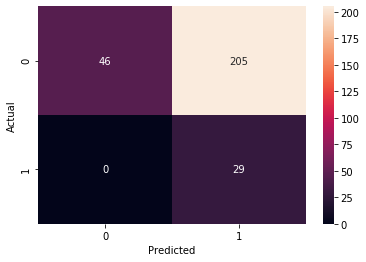

when the thereshold is 0.0251504862540918


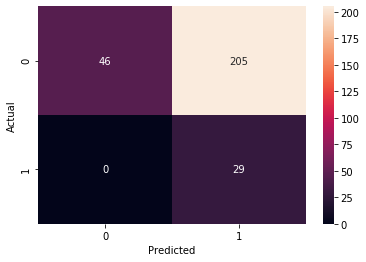

when the thereshold is 0.0250906403007845


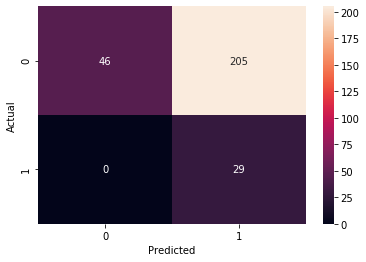

when the thereshold is 0.0248721426473526


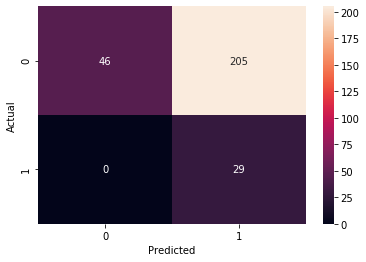

when the thereshold is 0.0248047461889740


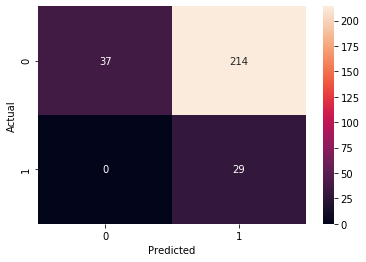

when the thereshold is 0.0247714583169142


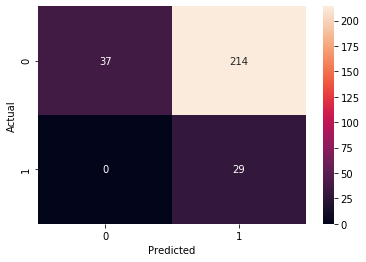

when the thereshold is 0.0247523273223265


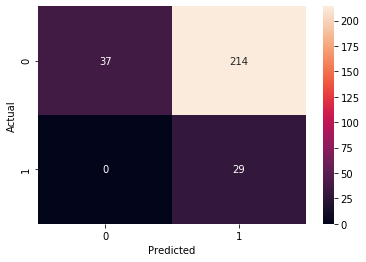

when the thereshold is 0.0245689400805326


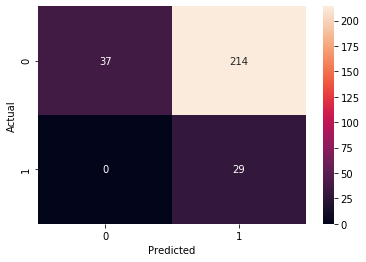

when the thereshold is 0.0245588246487786


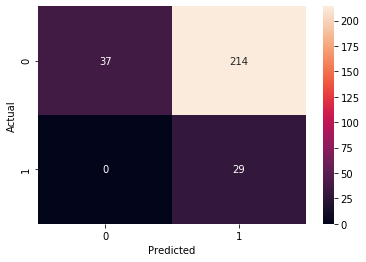

when the thereshold is 0.0237501200511205


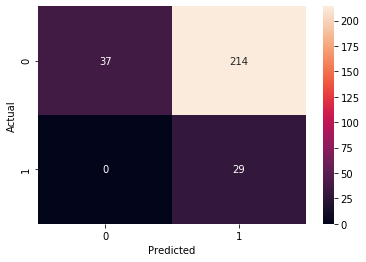

when the thereshold is 0.0237446909303787


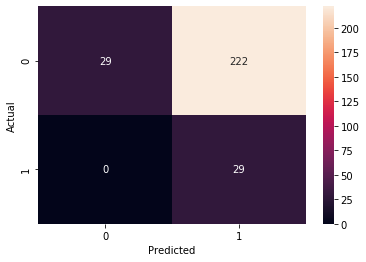

when the thereshold is 0.0237050391762088


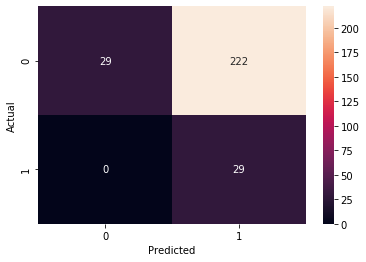

when the thereshold is 0.0236855802605571


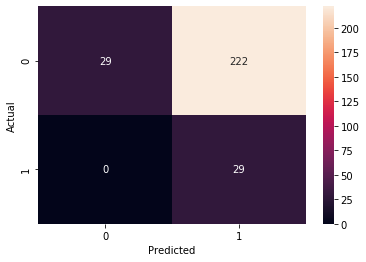

when the thereshold is 0.0224113711152009


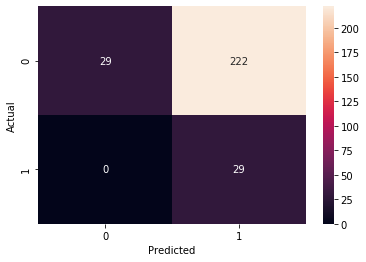

when the thereshold is 0.0223802231584410


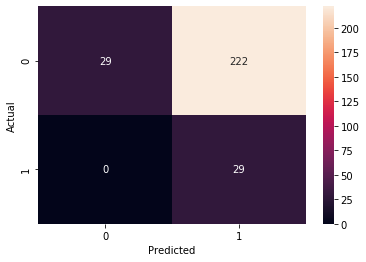

when the thereshold is 0.0223246366618173


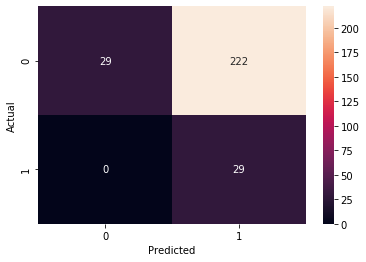

when the thereshold is 0.0204889785851412


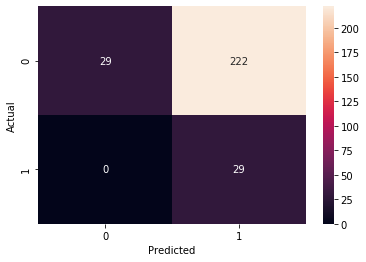

when the thereshold is 0.0204819096663300


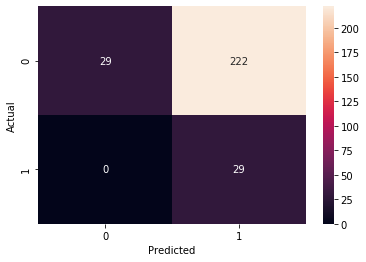

when the thereshold is 0.0204229526357896


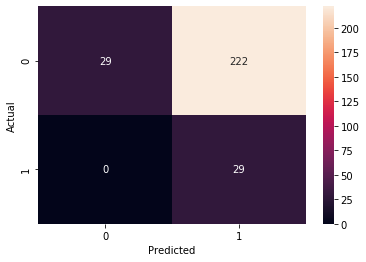

when the thereshold is 0.0203066153418243


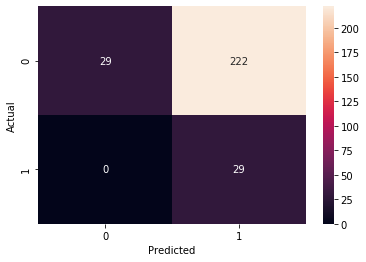

when the thereshold is 0.0183021782396433


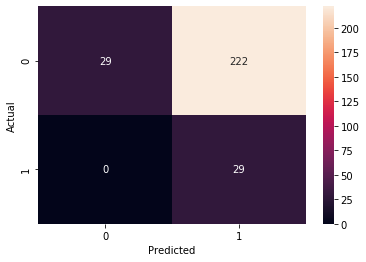

when the thereshold is 0.0179929638213241


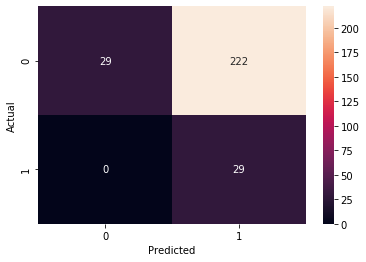

when the thereshold is 0.0168229913913778


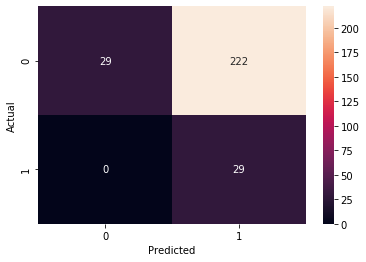

when the thereshold is 0.0168227211181767


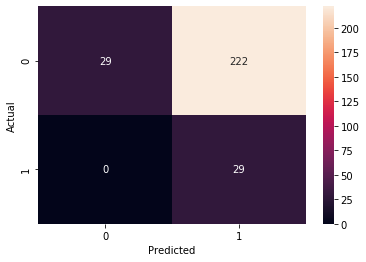

when the thereshold is 0.0168220162620513


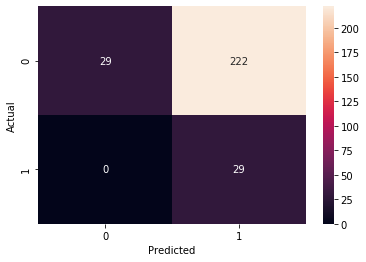

when the thereshold is 0.0168182434978705


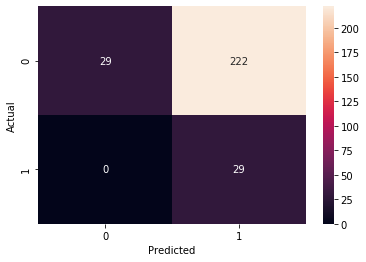

when the thereshold is 0.0168151621067765


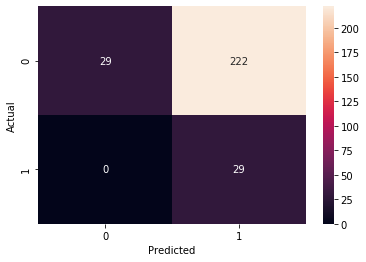

when the thereshold is 0.0168147466376014


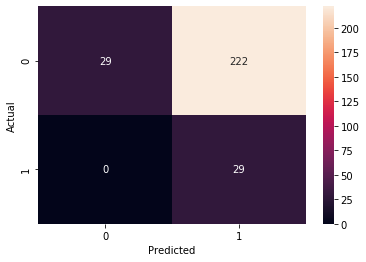

when the thereshold is 0.0158915988220627


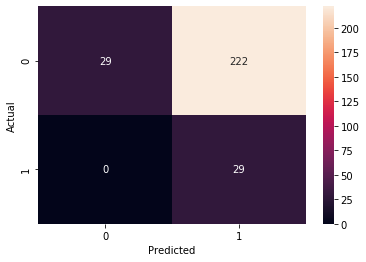

when the thereshold is 0.0158855615767734


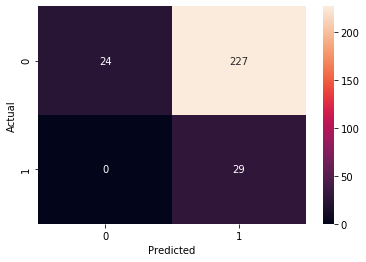

when the thereshold is 0.0158790837459639


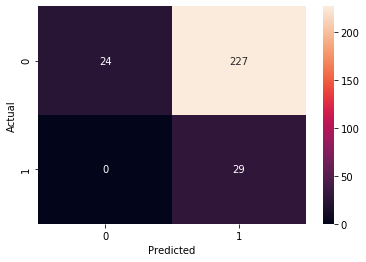

when the thereshold is 0.0158761389498362


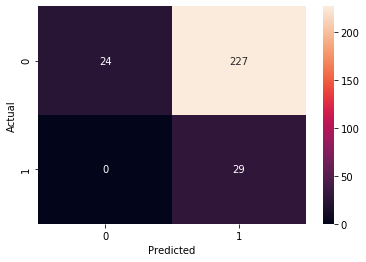

when the thereshold is 0.0158731378006167


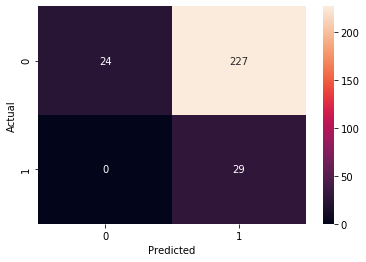

when the thereshold is 0.0153776372670769


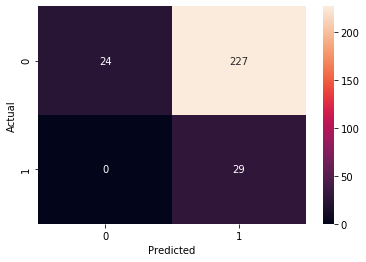

when the thereshold is 0.0153654616293014


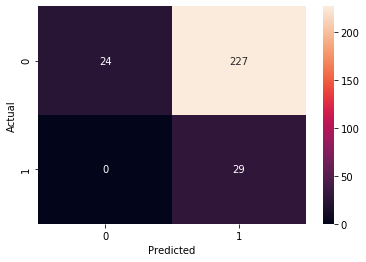

when the thereshold is 0.0151843931954012


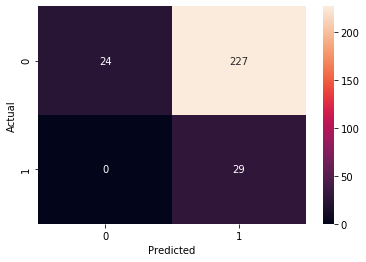

when the thereshold is 0.0150318710161180


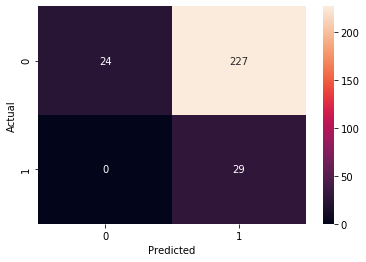

when the thereshold is 0.0150211276864373


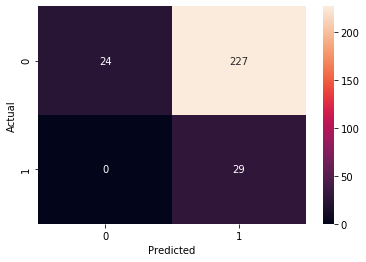

when the thereshold is 0.0149771911726875


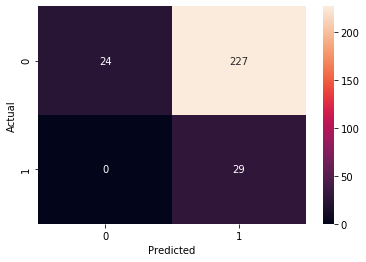

when the thereshold is 0.0149768656138440


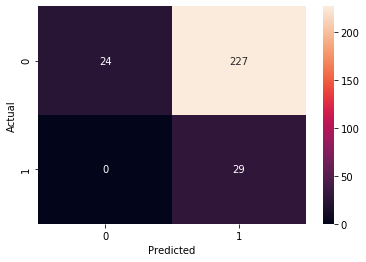

when the thereshold is 0.0149759891928123


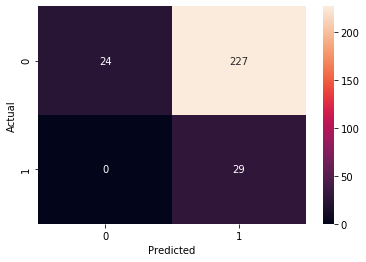

when the thereshold is 0.0149753661601223


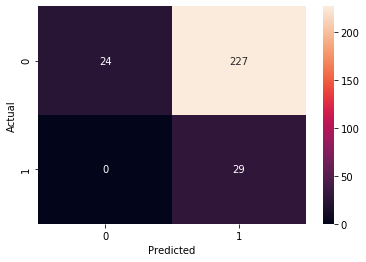

when the thereshold is 0.0149613590913799


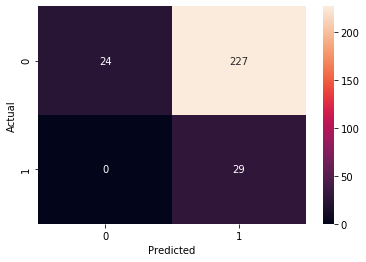

when the thereshold is 0.0149569054996390


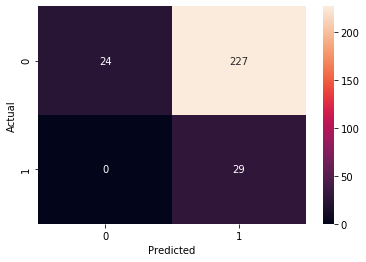

when the thereshold is 0.0149207455274227


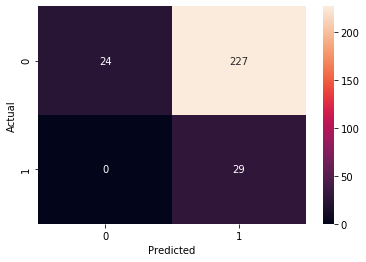

when the thereshold is 0.0149145272880640


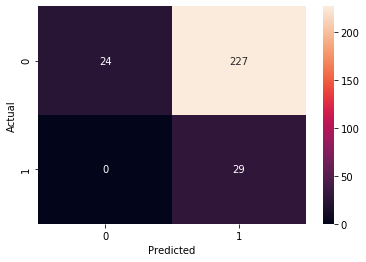

when the thereshold is 0.0149128226938500


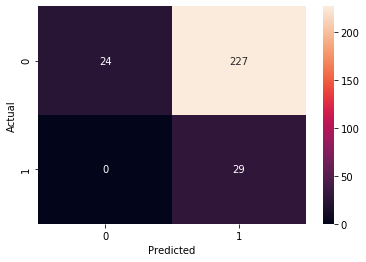

when the thereshold is 0.0149113420324827


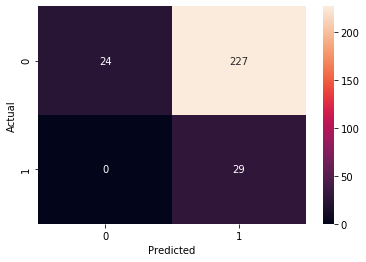

when the thereshold is 0.0149103947403827


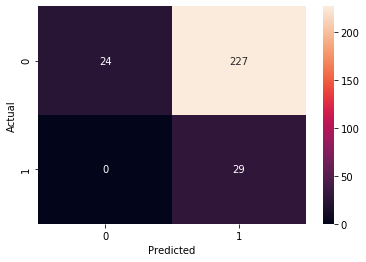

when the thereshold is 0.0148719050298789


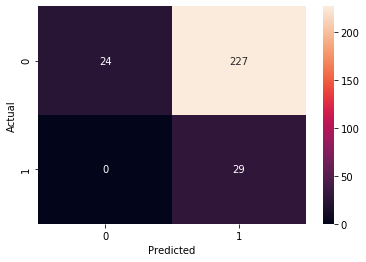

when the thereshold is 0.0148694786865590


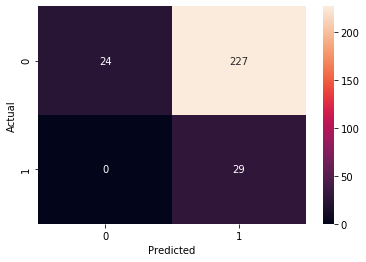

when the thereshold is 0.0148684007645646


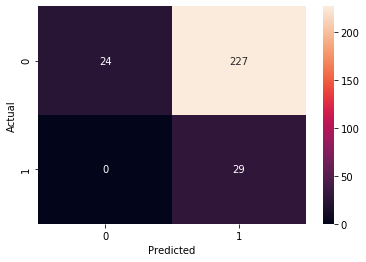

when the thereshold is 0.0148651587942846


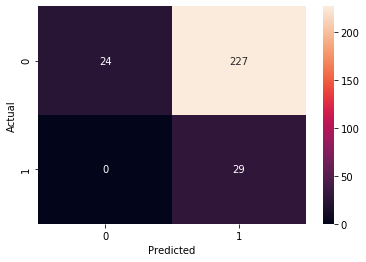

when the thereshold is 0.0148620002991483


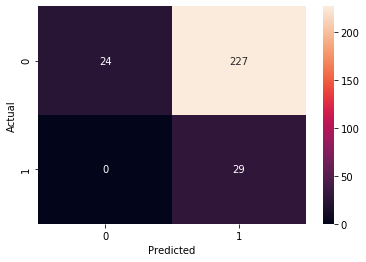

when the thereshold is 0.0148597096970267


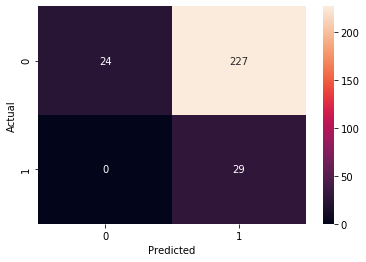

when the thereshold is 0.0148596277950480


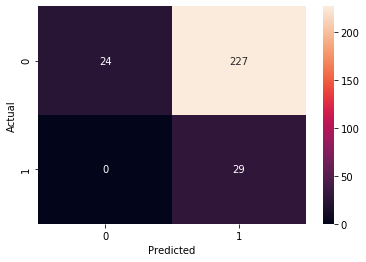

when the thereshold is 0.0148594655077803


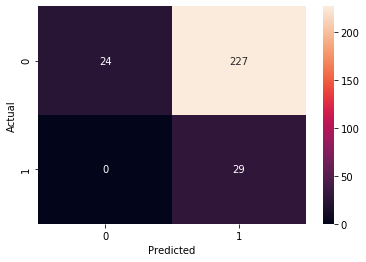

when the thereshold is 0.0148592506610831


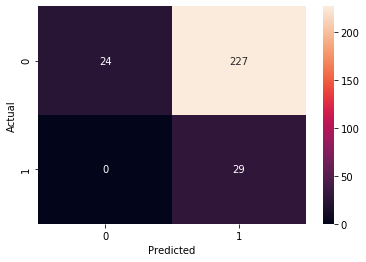

when the thereshold is 0.0148591471062402


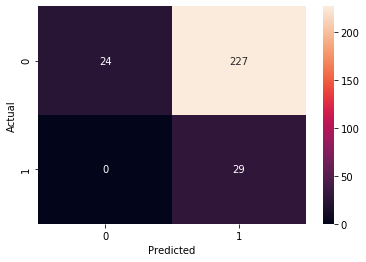

when the thereshold is 0.0148582888374329


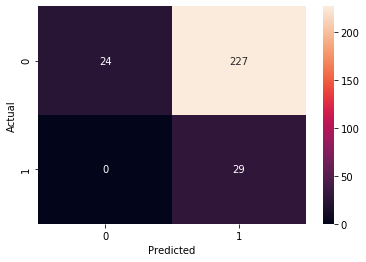

when the thereshold is 0.0148573225427574


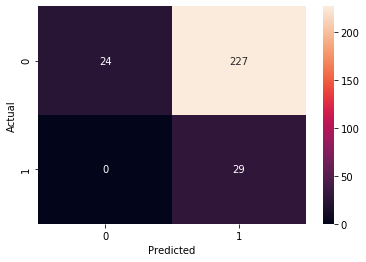

when the thereshold is 0.0148569076855596


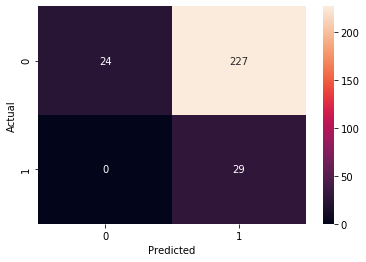

when the thereshold is 0.0147970141328853


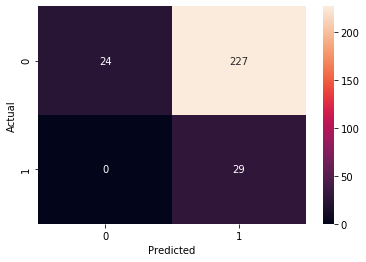

when the thereshold is 0.0147950762802748


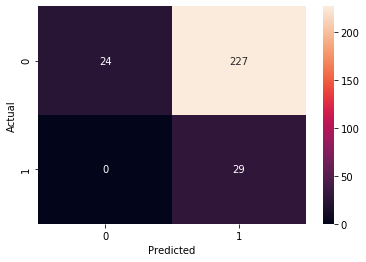

when the thereshold is 0.0147945966278463


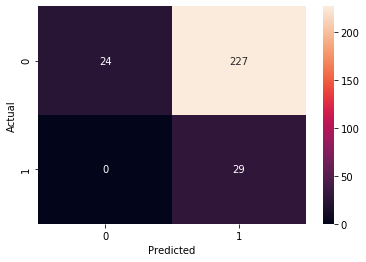

when the thereshold is 0.0147895308601181


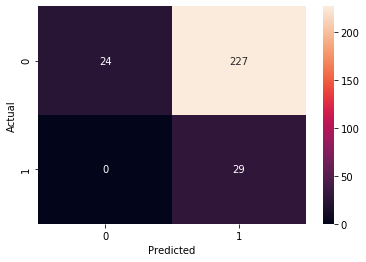

when the thereshold is 0.0147825724418981


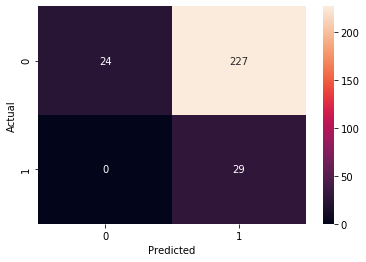

when the thereshold is 0.0147796046291490


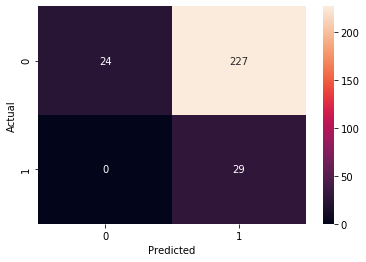

when the thereshold is 0.0147778341637741


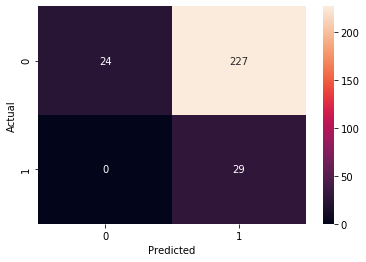

when the thereshold is 0.0147774117497053


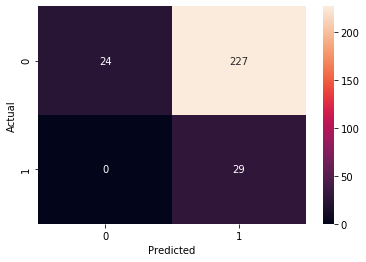

when the thereshold is 0.0147770331919283


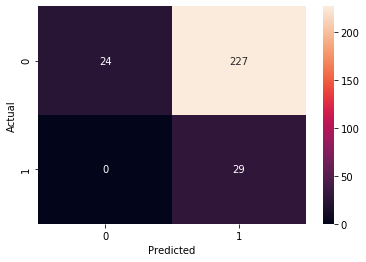

when the thereshold is 0.0147749905956918


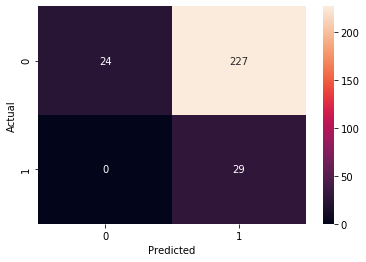

when the thereshold is 0.0147721896629038


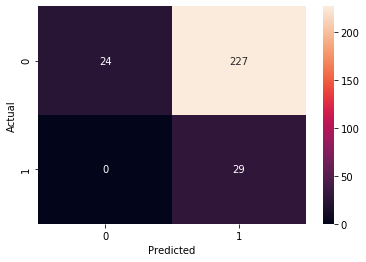

when the thereshold is 0.0147705364618189


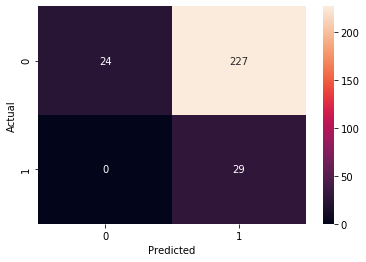

when the thereshold is 0.0147700706351377


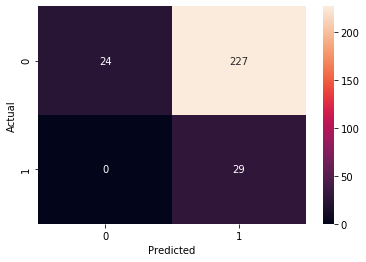

when the thereshold is 0.0147409735314332


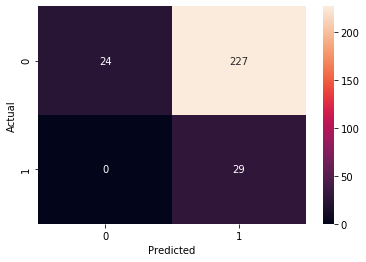

when the thereshold is 0.0147409233907640


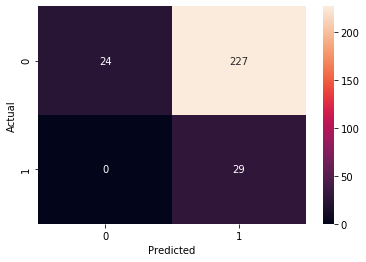

when the thereshold is 0.0147072806498656


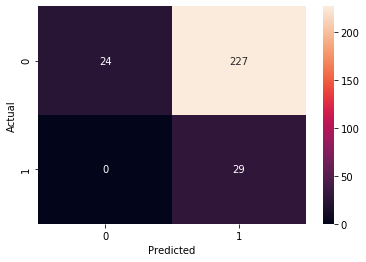

when the thereshold is 0.0146939904730989


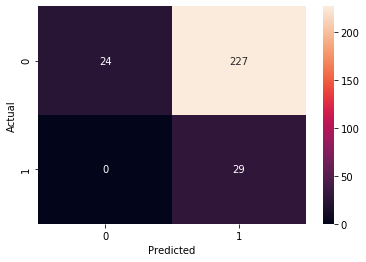

when the thereshold is 0.0146919246168652


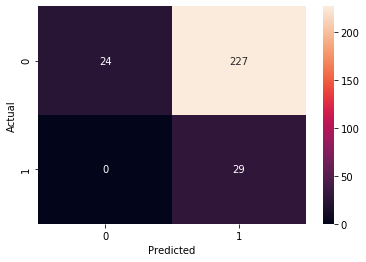

when the thereshold is 0.0146900249097563


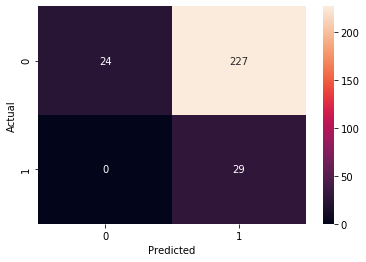

when the thereshold is 0.0146881637205601


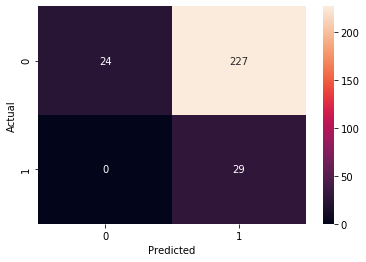

when the thereshold is 0.0146549797973689


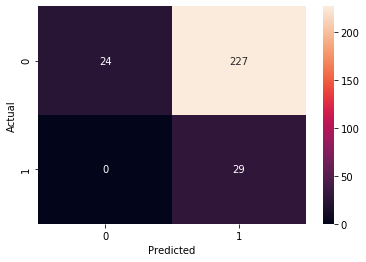

when the thereshold is 0.0146530537702909


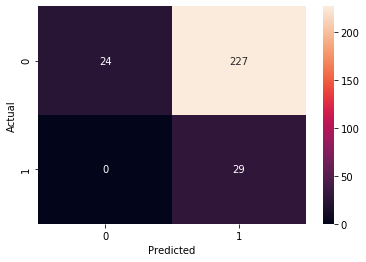

when the thereshold is 0.0146524653667916


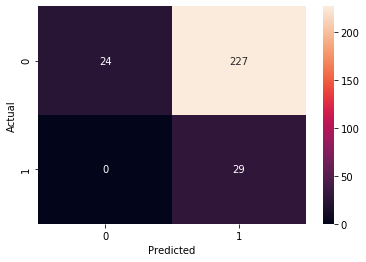

when the thereshold is 0.0146519857645929


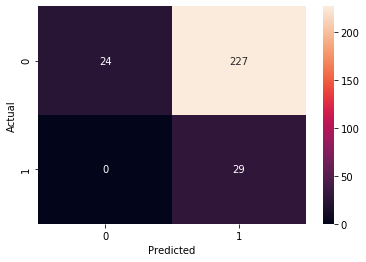

when the thereshold is 0.0146517907046146


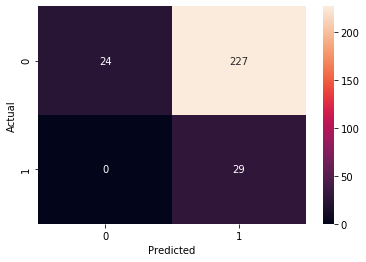

when the thereshold is 0.0146513121853446


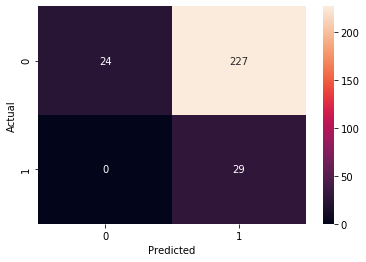

when the thereshold is 0.0145911977060189


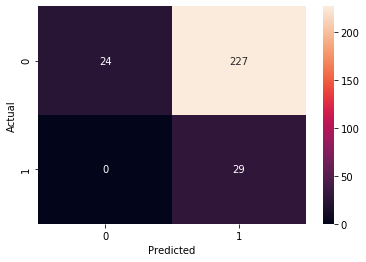

when the thereshold is 0.0145601858765312


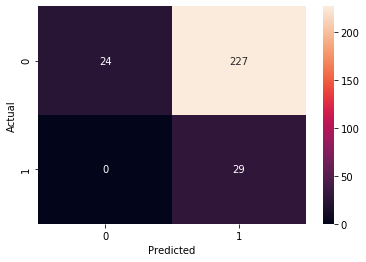

when the thereshold is 0.0145577865398165


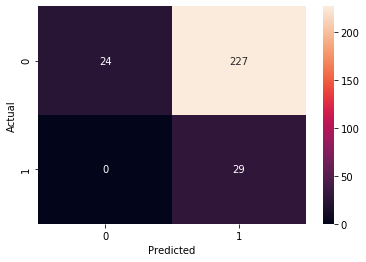

when the thereshold is 0.0145087466312726


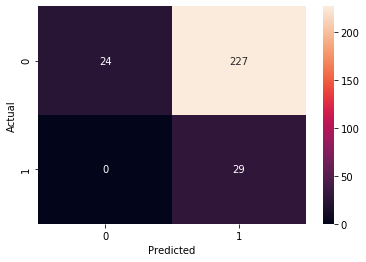

when the thereshold is 0.0143851944552316


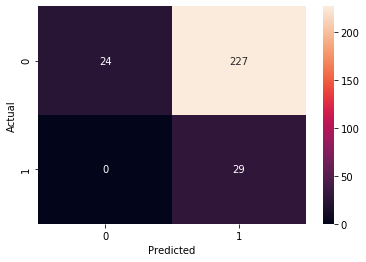

when the thereshold is 0.0143840654103957


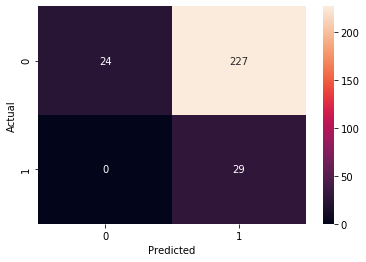

when the thereshold is 0.0143833076202180


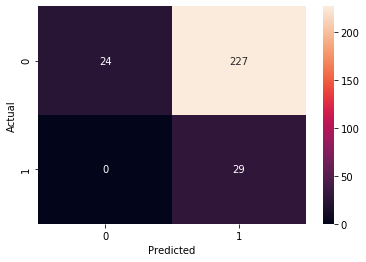

when the thereshold is 0.0143580412310491


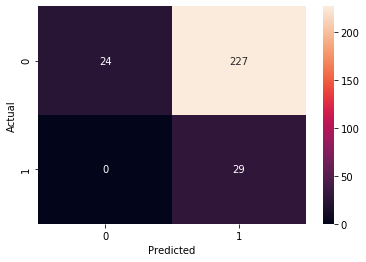

when the thereshold is 0.0143574616134095


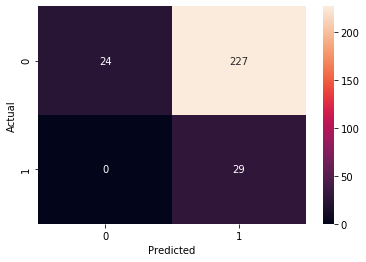

when the thereshold is 0.0143571563379442


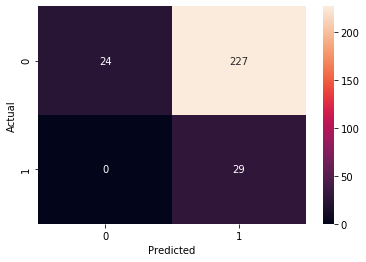

when the thereshold is 0.0143444344839069


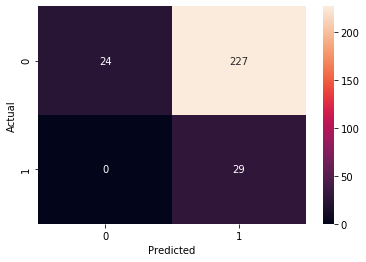

when the thereshold is 0.0142616337636430


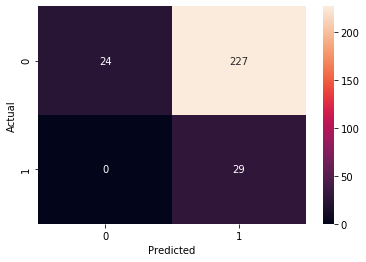

when the thereshold is 0.0142611541614443


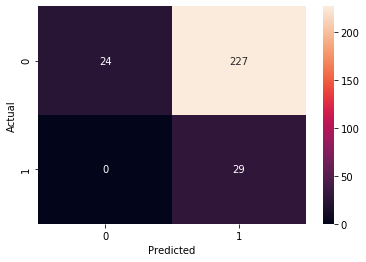

when the thereshold is 0.0142601600473039


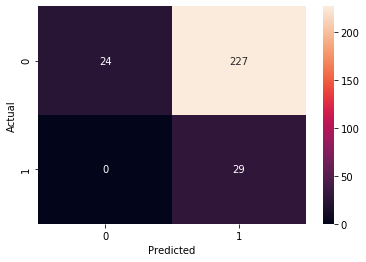

when the thereshold is 0.0142598771059676


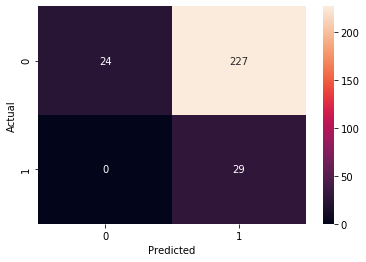

when the thereshold is 0.0142573248125188


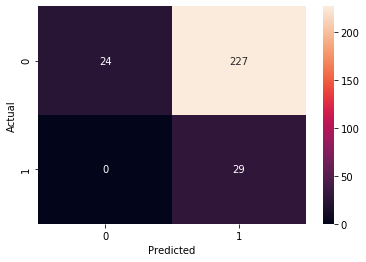

when the thereshold is 0.0142344718406872


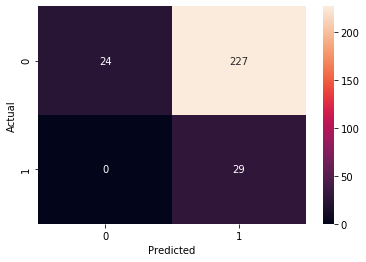

when the thereshold is 0.0142300003155747


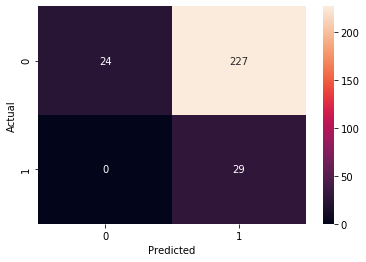

when the thereshold is 0.0142007564395684


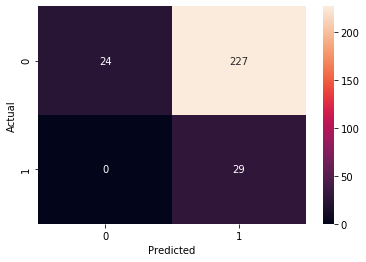

when the thereshold is 0.0141953936786413


KeyboardInterrupt: 

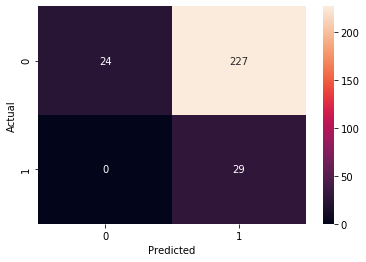

In [15]:
# use different thereshold to get the confusion matrix of test data

for _threshold in leave_one_cv.thrshd_roc:
    print('when the thereshold is %.16f' % _threshold)
    visual.plot_confusion(leave_one_cv.clf, leave_one_cv.X_test, leave_one_cv.Y_test, _threshold)

# The confusion matrix of trainning data when threshold is 0.9

In [ ]:
visual.plot_confusion(leave_one_cv.clf, leave_one_cv.X_train, leave_one_cv.Y_train, 0.9)

# try other models

In [16]:
leave_one_cv_SCV = LeaveOneOutModel(X_train, X_test, Y_train, Y_test, 'SCV')

C:\Users\runningplover\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\runningplover\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\runningplover\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\runningplover\Anaconda3\lib\site-packages\skle

C:\Users\runningplover\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\runningplover\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\runningplover\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\runningplover\Anaconda3\lib\site-packages\skle

C:\Users\runningplover\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\runningplover\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\runningplover\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\runningplover\Anaconda3\lib\site-packages\skle

C:\Users\runningplover\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\runningplover\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\runningplover\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\runningplover\Anaconda3\lib\site-packages\skle

C:\Users\runningplover\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\runningplover\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\runningplover\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\runningplover\Anaconda3\lib\site-packages\skle

C:\Users\runningplover\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\runningplover\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\runningplover\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\runningplover\Anaconda3\lib\site-packages\skle

C:\Users\runningplover\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\runningplover\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\runningplover\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\runningplover\Anaconda3\lib\site-packages\skle

C:\Users\runningplover\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\runningplover\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\runningplover\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\runningplover\Anaconda3\lib\site-packages\skle

C:\Users\runningplover\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\runningplover\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\runningplover\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\runningplover\Anaconda3\lib\site-packages\skle

C:\Users\runningplover\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\runningplover\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\runningplover\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\runningplover\Anaconda3\lib\site-packages\skle

C:\Users\runningplover\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\runningplover\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\runningplover\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\runningplover\Anaconda3\lib\site-packages\skle

C:\Users\runningplover\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\runningplover\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\runningplover\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\runningplover\Anaconda3\lib\site-packages\skle

C:\Users\runningplover\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\runningplover\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\runningplover\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\runningplover\Anaconda3\lib\site-packages\skle

KeyboardInterrupt: 

In [ ]:
visual.plot_roc_curve(leave_one_cv_SCV.fpr, leave_one_cv_SCV.tpr)

In [ ]:
# use different thereshold to get the confusion matrix of test data

for _threshold in leave_one_cv_SCV.thrshd_roc:
    print('when the thereshold is %.16f' % _threshold)
    visual.plot_confusion(leave_one_cv_SCV.clf, leave_one_cv_SCV.X_test, leave_one_cv_SCV.Y_test, _threshold)

In [17]:
leave_one_cv_MLP = LeaveOneOutModel(X_train, X_test, Y_train, Y_test, 'MLP')

KeyboardInterrupt: 

In [ ]:
visual.plot_roc_curve(leave_one_cv_MLP.fpr, leave_one_cv_MLP.tpr)

In [ ]:
# use different thereshold to get the confusion matrix of test data

for _threshold in leave_one_cv_MLP.thrshd_roc:
    print('when the thereshold is %.16f' % _threshold)
    visual.plot_confusion(leave_one_cv_MLP.clf, leave_one_cv_MLP.X_test, leave_one_cv_MLP.Y_test, _threshold)